<a href="https://colab.research.google.com/github/kpatwa153/gis/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#! pip install geopandas
!pip install mapclassify
!pip install mplcursors
import geopandas as gpd
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 951.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=7a7b3b5c13cd3c84b7dfc7e6caa25a2b23a85e24e54e355f0c143a475a89fd1e
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [ ]:
!pip install openpyxl

## My Area of Interest
The dataset provides the percentage of Obesity across USA state wise. The data is obtained from the 2015 CDC BRFSS Survey. Reason behind the Obesity can later be found out by connecting it with data related to Walkability per state and the population density.

The data is present at data.gov site. Here is the link to view it online: https://catalog.data.gov/dataset/national-obesity-by-state-d765a

Link to download the file: https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::national-obesity-by-state.zip?outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D

The obesity dataset is further compared with the population density dataset

Population Density Dataset link: https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&activeTab=map&currentTimeframe=5&selectedDistributions=children-0-18&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

Link to Dowload the dataset: https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&activeTab=map&currentTimeframe=5&selectedDistributions=children-0-18&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D


2015 County Health Ranking Data: https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation/national-data-documentation-2010-2019

The above dataset provides the Ranking of the county of each state on various factors such as Food Environmental Index, Percentage of Obesity, Physical Inactivity, Access to excercise opportunity. Since these variables are related to obesity, I used this dataset to find the correlation with obesity.

## **PS0 Assignment**

In [ ]:
#importing the data
! wget -q -O us_map.zip https://drive.google.com/uc?id=1hFpTOmjP-Ti7JAEZfD0V3mRtF5siqS5Q&export=download

zip_ref = zipfile.ZipFile('us_map.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


In [ ]:
#Reading the shapefile data under obs object
obs=gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

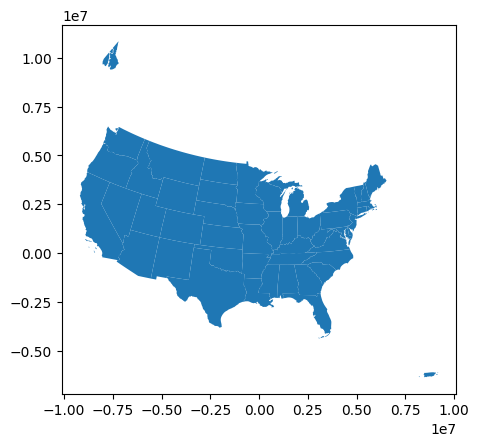

In [ ]:
#make the map
obs.plot()

In [ ]:
#Finding the data type of all the columns of the dataset
obs.dtypes

FID              int64
NAME            object
Obesity        float64
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

# Exploratory Data Analysis

In [ ]:
#Using the describe function
obs.describe().round(2) #aok: good, yes do use it

FID  Obesity   SHAPE_Leng    SHAPE_Area
count  52.00    52.00        52.00  5.200000e+01
mean   26.50    29.29   6294281.64  1.724137e+12
std    15.15     3.83   3068680.70  1.455130e+12
min     1.00    20.20         0.00  0.000000e+00
25%    13.75    26.25   5022132.32  8.299946e+11
50%    26.50    29.80   6445437.64  1.492228e+12
75%    39.25    31.48   7747382.82  2.245753e+12
max    52.00    36.20  15408321.87  7.672329e+12

<Axes: >

[]

[]

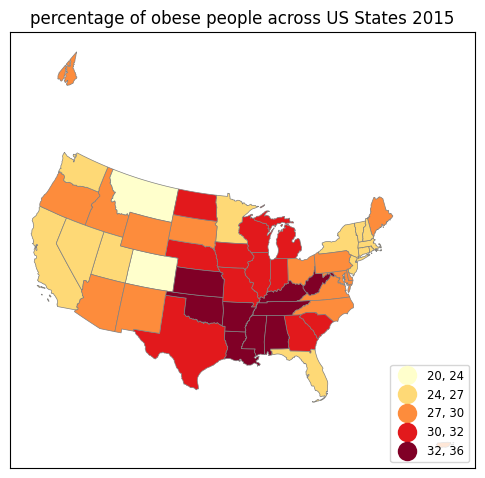

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
obs.plot(ax=ax,column='Obesity',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people across US States 2015")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


# **PS 1** **Assignment**

In [ ]:
! wget -q -O population_distribution_by_age_number_2015.csv "https://drive.google.com/uc?export=download&id=1UGWwj7_AY0FuCp04ICaqCNII-FYh_dlh"
population_density = pd.read_csv("population_distribution_by_age_number_2015.csv")
population_density

Location  Children 0-18  \
0                                       United States     76080400.0   
1                                             Alabama      1150500.0   
2                                              Alaska       191500.0   
3                                             Arizona      1672500.0   
4                                            Arkansas       721000.0   
..                                                ...            ...   
64  KFF estimates based on the 2008-2021 American ...            NaN   
65                                                NaN            NaN   
66                                                NaN            NaN   
67                                          Footnotes            NaN   
68                  1. US total excludes Puerto Rico.            NaN   

    Adults 19-25  Adults 26-34  Adults 35-54  Adults 55-64         65+  \
0     28950400.0    37990300.0    82829900.0    40508000.0  46418900.0   
1       424900.0      544800.0     1232300.0      631600.0    746000.0   
2        78800.0       96300.0      177800.0       92400.0     70800.0   
3       631300.0      779700.0     1661800.0      804400.0   1105300.0   
4       259900.0      334700.0      738300.0      369900.0    458600.0   
..           ...           ...           ...           ...         ...   
64           NaN           NaN           NaN           NaN         NaN   
65           NaN           NaN           NaN           NaN         NaN   
66           NaN           NaN           NaN           NaN         NaN   
67           NaN           NaN           NaN           NaN         NaN   
68           NaN           NaN           NaN           NaN         NaN   

          Total  Footnotes  
0   312777900.0        1.0  
1     4730100.0        NaN  
2      707500.0        NaN  
3     6655100.0        NaN  
4     2882300.0        NaN  
..          ...        ...  
64          NaN        NaN  
65          NaN        NaN  
66          NaN        NaN  
67          NaN        NaN  
68          NaN        NaN  

[69 rows x 9 columns]

In [ ]:
df2 = population_density.drop(['Footnotes'],axis = 1)
df2

Location  Children 0-18  \
0                                       United States     76080400.0   
1                                             Alabama      1150500.0   
2                                              Alaska       191500.0   
3                                             Arizona      1672500.0   
4                                            Arkansas       721000.0   
..                                                ...            ...   
64  KFF estimates based on the 2008-2021 American ...            NaN   
65                                                NaN            NaN   
66                                                NaN            NaN   
67                                          Footnotes            NaN   
68                  1. US total excludes Puerto Rico.            NaN   

    Adults 19-25  Adults 26-34  Adults 35-54  Adults 55-64         65+  \
0     28950400.0    37990300.0    82829900.0    40508000.0  46418900.0   
1       424900.0      544800.0     1232300.0      631600.0    746000.0   
2        78800.0       96300.0      177800.0       92400.0     70800.0   
3       631300.0      779700.0     1661800.0      804400.0   1105300.0   
4       259900.0      334700.0      738300.0      369900.0    458600.0   
..           ...           ...           ...           ...         ...   
64           NaN           NaN           NaN           NaN         NaN   
65           NaN           NaN           NaN           NaN         NaN   
66           NaN           NaN           NaN           NaN         NaN   
67           NaN           NaN           NaN           NaN         NaN   
68           NaN           NaN           NaN           NaN         NaN   

          Total  
0   312777900.0  
1     4730100.0  
2      707500.0  
3     6655100.0  
4     2882300.0  
..          ...  
64          NaN  
65          NaN  
66          NaN  
67          NaN  
68          NaN  

[69 rows x 8 columns]

In [ ]:
rows_to_drop = list(range(53,69))
df2 = df2.drop(rows_to_drop,axis = 0)


In [ ]:
df2['percentage_us_population_per_state'] = (df2['Total'] / df2.loc[0,'Total']) * 100
df2['percentage_us_population_per_state'] = round(df2['percentage_us_population_per_state'],2)
df2

Location  Children 0-18  Adults 19-25  Adults 26-34  \
0          United States     76080400.0    28950400.0    37990300.0   
1                Alabama      1150500.0      424900.0      544800.0   
2                 Alaska       191500.0       78800.0       96300.0   
3                Arizona      1672500.0      631300.0      779700.0   
4               Arkansas       721000.0      259900.0      334700.0   
5             California      9438000.0     3816900.0     5070900.0   
6               Colorado      1301000.0      496000.0      723500.0   
7            Connecticut       794900.0      304000.0      376100.0   
8               Delaware       211700.0       82200.0      105700.0   
9   District of Columbia       120100.0       66300.0      134800.0   
10               Florida      4263600.0     1710900.0     2213200.0   
11               Georgia      2604800.0      914700.0     1184900.0   
12                Hawaii       317600.0      120800.0      170400.0   
13                 Idaho       446200.0      147900.0      186300.0   
14              Illinois      3048200.0     1175400.0     1549800.0   
15               Indiana      1623900.0      607400.0      730400.0   
16                  Iowa       743400.0      278600.0      348900.0   
17                Kansas       742200.0      261900.0      334300.0   
18              Kentucky      1037500.0      385700.0      481200.0   
19             Louisiana      1156400.0      434100.0      572700.0   
20                 Maine       259000.0      103000.0      129600.0   
21              Maryland      1383200.0      530000.0      709200.0   
22         Massachusetts      1432100.0      595200.0      818300.0   
23              Michigan      2274300.0      919100.0     1074100.0   
24             Minnesota      1321800.0      458100.0      671100.0   
25           Mississippi       760300.0      272600.0      315100.0   
26              Missouri      1428600.0      547100.0      685100.0   
27               Montana       230300.0       92600.0      114600.0   
28              Nebraska       485600.0      172100.0      218400.0   
29                Nevada       689200.0      254900.0      359100.0   
30         New Hampshire       274600.0      106600.0      135100.0   
31            New Jersey      2075400.0      753700.0     1003000.0   
32            New Mexico       519400.0      189400.0      236500.0   
33              New York      4327100.0     1822200.0     2503400.0   
34        North Carolina      2378000.0      871200.0     1119400.0   
35          North Dakota       178800.0       78300.0       99100.0   
36                  Ohio      2710600.0      995900.0     1295600.0   
37              Oklahoma       995700.0      343000.0      466300.0   
38                Oregon       883000.0      350800.0      488300.0   
39          Pennsylvania      2776500.0     1065700.0     1427900.0   
40          Rhode Island       218700.0       97300.0      122000.0   
41        South Carolina      1115400.0      444800.0      530600.0   
42          South Dakota       216900.0       73500.0       98500.0   
43             Tennessee      1547200.0      581200.0      746800.0   
44                 Texas      7486900.0     2601500.0     3445000.0   
45                  Utah       946200.0      324800.0      385800.0   
46               Vermont       120800.0       49800.0       67900.0   
47              Virginia      1937100.0      720800.0      976000.0   
48            Washington      1660800.0      634300.0      912500.0   
49         West Virginia       387400.0      154300.0      185400.0   
50             Wisconsin      1328900.0      496800.0      642500.0   
51               Wyoming       145700.0       52200.0       70100.0   
52           Puerto Rico       788400.0      343900.0      365900.0   

    Adults 35-54  Adults 55-64         65+        Total  \
0     82829900.0    40508000.0  46418900.0  312777900.0   
1      1232300.0      631600.0    746000.0    4730100.0   
2   

In [ ]:
obs.rename(columns = {'NAME':'Location'},inplace=True)

In [ ]:
merged_data = df2.merge(obs,on = 'Location',how='left')
merged_data['Obesity By Number'] = (merged_data['Total'] * merged_data['Obesity'])/100
merged_data['Obesity By Number'] = round(merged_data['Obesity By Number'],2)

In [ ]:
merged_data[['Location','Total']]

Location        Total
0          United States  312777900.0
1                Alabama    4730100.0
2                 Alaska     707500.0
3                Arizona    6655100.0
4               Arkansas    2882300.0
5             California   38325100.0
6               Colorado    5315400.0
7            Connecticut    3478100.0
8               Delaware     918300.0
9   District of Columbia     634800.0
10               Florida   19812500.0
11               Georgia    9909700.0
12                Hawaii    1362600.0
13                 Idaho    1617200.0
14              Illinois   12549700.0
15               Indiana    6415100.0
16                  Iowa    3019800.0
17                Kansas    2816600.0
18              Kentucky    4283400.0
19             Louisiana    4530300.0
20                 Maine    1292600.0
21              Maryland    5838300.0
22         Massachusetts    6555600.0
23              Michigan    9693800.0
24             Minnesota    5365600.0
25           Mississippi    2889300.0
26              Missouri    5890900.0
27               Montana    1005900.0
28              Nebraska    1838400.0
29                Nevada    2842700.0
30         New Hampshire    1287600.0
31            New Jersey    8776300.0
32            New Mexico    2035300.0
33              New York   19269200.0
34        North Carolina    9733700.0
35          North Dakota     726400.0
36                  Ohio   11293300.0
37              Oklahoma    3783700.0
38                Oregon    3948700.0
39          Pennsylvania   12386400.0
40          Rhode Island    1014400.0
41        South Carolina    4734000.0
42          South Dakota     829000.0
43             Tennessee    6422800.0
44                 Texas   26777500.0
45                  Utah    2945200.0
46               Vermont     602400.0
47              Virginia    8051200.0
48            Washington    7002800.0
49         West Virginia    1791500.0
50             Wisconsin    5620900.0
51               Wyoming     568900.0
52           Puerto Rico    3443200.0

In [ ]:
merged_data['Obesity_per_state'] = round((merged_data['Obesity By Number'] * 100 / df2.loc[0,'Total']),2)
merged_data.describe()

Children 0-18  Adults 19-25  Adults 26-34  Adults 35-54  Adults 55-64  \
count   5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01   
mean    2.885836e+06  1.098958e+06  1.440511e+06  3.142577e+06  1.536694e+06   
std     1.039015e+07  3.955786e+06  5.193199e+06  1.130903e+07  5.521108e+06   
min     1.201000e+05  4.980000e+04  6.790000e+04  1.390000e+05  7.060000e+04   
25%     4.462000e+05  1.543000e+05  1.863000e+05  4.579000e+05  2.364000e+05   
50%     1.037500e+06  3.857000e+05  4.883000e+05  1.142800e+06  5.843000e+05   
75%     1.672500e+06  6.343000e+05  9.125000e+05  1.857300e+06  9.254000e+05   
max     7.608040e+07  2.895040e+07  3.799030e+07  8.282990e+07  4.050800e+07   

                65+         Total  percentage_us_population_per_state  \
count  5.300000e+01  5.300000e+01                           53.000000   
mean   1.763334e+06  1.186791e+07                            3.793962   
std    6.328178e+06  4.269083e+07                           13.648920   
min    7.080000e+04  5.689000e+05                            0.180000   
25%    2.679000e+05  1.791500e+06                            0.570000   
50%    6.514000e+05  4.283400e+06                            1.370000   
75%    1.105300e+06  7.002800e+06                            2.240000   
max    4.641890e+07  3.127779e+08                          100.000000   

             FID    Obesity    SHAPE_Leng    SHAPE_Area  Obesity By Number  \
count  52.000000  52.000000  5.200000e+01  5.200000e+01       5.200000e+01   
mean   26.500000  29.286538  6.294282e+06  1.724137e+12       1.754854e+06   
std    15.154757   3.832832  3.068681e+06  1.455130e+12       1.894171e+06   
min     1.000000  20.200000  0.000000e+00  0.000000e+00       1.402908e+05   
25%    13.750000  26.250000  5.022132e+06  8.299946e+11       5.485730e+05   
50%    26.500000  29.800000  6.445438e+06  1.492228e+12       1.235616e+06   
75%    39.250000  31.475000  7.747383e+06  2.245753e+12       2.048671e+06   
max    52.000000  36.200000  1.540832e+07  7.672329e+12       9.274674e+06   

       Obesity_per_state  
count          52.000000  
mean            0.560769  
std             0.606174  
min             0.040000  
25%             0.172500  
50%             0.395000  
75%             0.652500  
max             2.970000

In [ ]:
population = merged_data[['Children 0-18','Adults 19-25','Adults 26-34','Adults 35-54','Adults 55-64','65+','geometry','Location']]
population['Adults'] = population['Adults 19-25'] + population['Adults 26-34'] + population['Adults 35-54'] + population['Adults 55-64']
del population['Adults 19-25']
del population['Adults 26-34']
del population['Adults 35-54']
del population['Adults 55-64']
population.dtypes

<ipython-input-18-b371281df9d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['Adults'] = population['Adults 19-25'] + population['Adults 26-34'] + population['Adults 35-54'] + population['Adults 55-64']


Children 0-18     float64
65+               float64
geometry         geometry
Location           object
Adults            float64
dtype: object

aok: what is pop dens??? and your top cat 9-76m does not appear on the map

<Axes: >

[]

[]

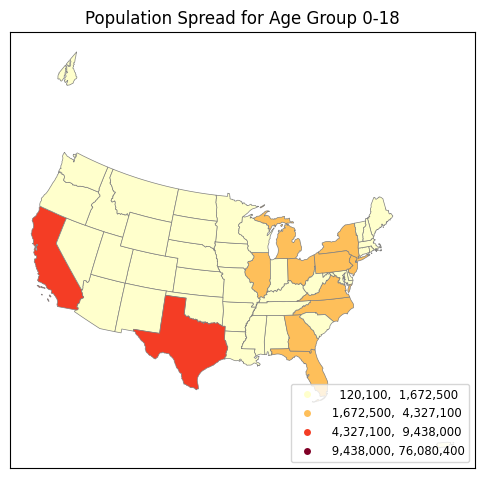

In [ ]:
gdp = gpd.GeoDataFrame(population,geometry = 'geometry')
fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='Children 0-18',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #
ax.title.set_text("Population Spread for Age Group 0-18")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


<Axes: >

[]

[]

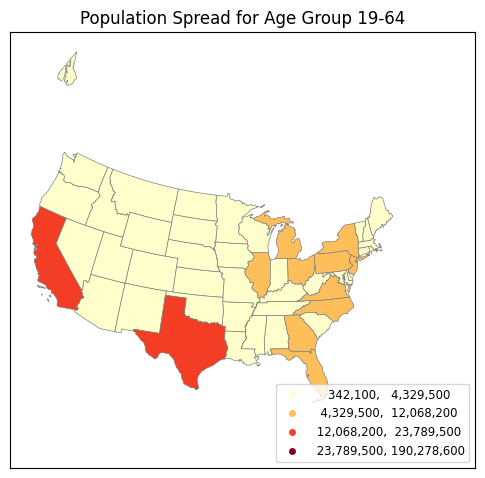

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='Adults',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #
ax.title.set_text("Population Spread for Age Group 19-64")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

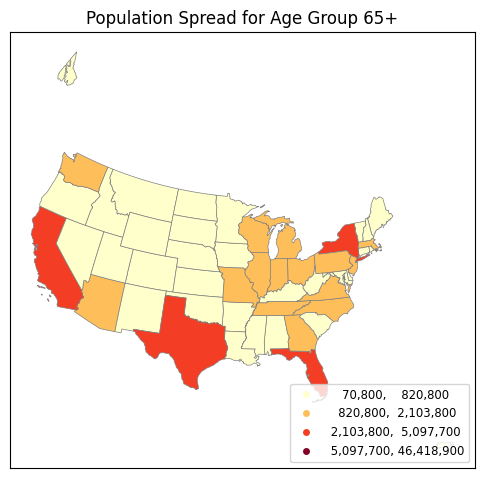

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='65+',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #

ax.title.set_text("Population Spread for Age Group 65+")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [ ]:
#df2 = df2.drop([0],axis = 0)
#df2

In [ ]:
gdf = gpd.GeoDataFrame(merged_data,geometry = 'geometry')

percentage of obese people across US States 2015 in comparison with total population of US--what is it? like 1st map was showing like 10-35perc, why here so different??? doesnt make sense

<Axes: >

[]

[]

<Axes: >

[]

[]

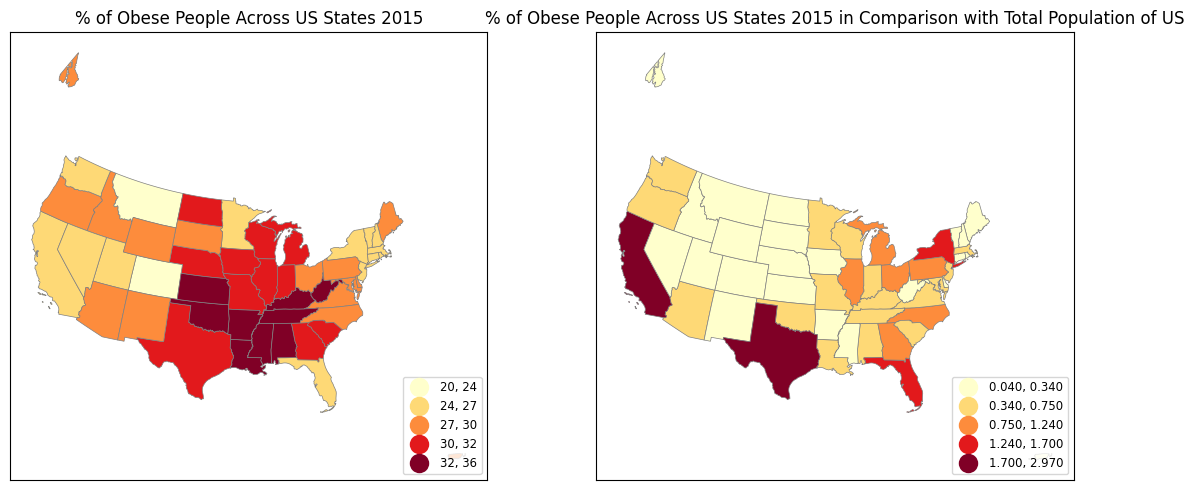

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first map on the first subplot (axes[0])
obs.plot(ax=axes[0], column='Obesity', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}",
        'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axes[0].title.set_text("% of Obese People Across US States 2015")
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot the second map on the second subplot (axes[1])
gdf.plot(ax=axes[1], column='Obesity_per_state', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.3f}",
        'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axes[1].title.set_text("% of Obese People Across US States 2015 in Comparison with Total Population of US")
axes[1].set_xticks([])
axes[1].set_yticks([])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
merged = merged_data[merged_data['Location']!='United States']

<Axes: >

[]

[]

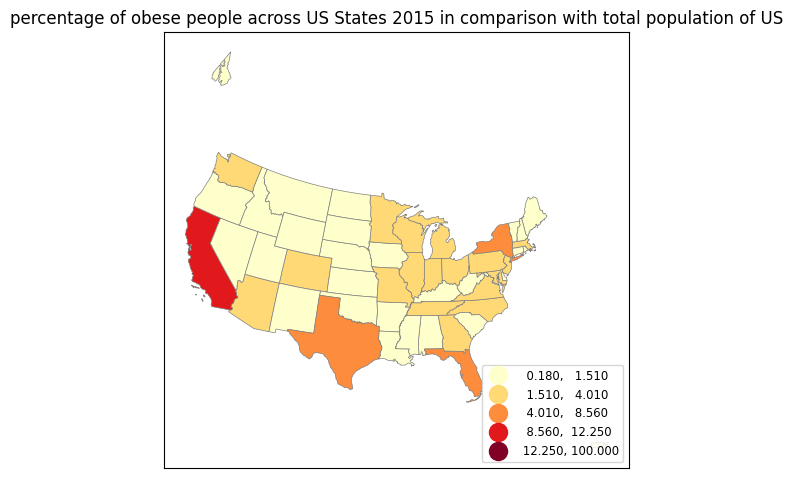

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='percentage_us_population_per_state',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.3f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people across US States 2015 in comparison with total population of US")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [ ]:
merged.dtypes

Location                                object
Children 0-18                          float64
Adults 19-25                           float64
Adults 26-34                           float64
Adults 35-54                           float64
Adults 55-64                           float64
65+                                    float64
Total                                  float64
percentage_us_population_per_state     float64
FID                                    float64
Obesity                                float64
SHAPE_Leng                             float64
SHAPE_Area                             float64
geometry                              geometry
Obesity By Number                      float64
Obesity_per_state                      float64
dtype: object

# PS2 Assignment


In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import data_table
data_table.enable_dataframe_formatter()
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
import geopandas as gpd


!pip install mapclassify
import mapclassify

! pip install contextily
import contextily as cx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 28.9 MB/s eta 0:00:00


In [ ]:
! wget -q -O health_data.xls "https://drive.google.com/uc?export=download&id=1nrmuqwrWkZ7-AnfjZQOxgYri6QMQHQE9"
health_data = pd.read_excel('health_data.xls',sheet_name = 'Ranked Measure Data',header = [0,1],engine = 'xlrd')
health_data.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Premature death  \
                FIPS              State             County        # Deaths   
0             1001.0            Alabama            Autauga           754.0   
1             1003.0            Alabama            Baldwin          2460.0   
2             1005.0            Alabama            Barbour           414.0   
3             1007.0            Alabama               Bibb           407.0   
4             1009.0            Alabama             Blount           861.0   

                                                                         \
  Years of Potential Life Lost Rate 95% CI - Low 95% CI - High Quartile   
0                           8405.21     7553.786      9256.634        1   
1                           7456.89     7005.698      7908.082        1   
2                           8900.51     7579.705     10221.315        1   
3                          10729.22     9124.254     12334.186        3   
4                           8668.52     7801.514      9535.526        1   

  Poor or fair health              ... Driving alone to work                \
          Sample Size % Fair/Poor  ...             # Workers % Drive Alone   
0               407.0        22.8  ...               24144.0     88.518887   
1              1664.0        12.7  ...               80619.0     83.694911   
2               423.0        23.4  ...                9163.0     82.200153   
3               379.0        17.9  ...                7845.0     83.212237   
4               367.0        24.2  ...               22580.0     83.330381   

                                      Long commute - driving alone  \
  95% CI - Low 95% CI - High Quartile    # Workers who Drive Alone   
0    86.505618     90.532156        4                      21372.0   
1    82.004780     85.385041        2                      67474.0   
2    81.248013     83.152292        1                       7532.0   
3    80.596411     85.828064        2                       6528.0   
4    80.753920     85.906842        2                      18816.0   

                                                                     
  % Long Commute - Drives Alone 95% CI - Low 95% CI - High Quartile  
0                          42.0    38.177937     45.822063        3  
1                          34.9    32.778614     37.021386        3  
2                          33.1    27.946206     38.253794        2  
3                          47.5    39.963418     55.036582        4  
4                          58.4    53.666922     63.133078        4  

[5 rows x 161 columns]

In [ ]:
health_data.columns = ['_'.join(col).strip() for col in health_data.columns.values]
health_data = health_data.rename(columns = {'Unnamed: 0_level_0_FIPS': 'FIPS', 'Unnamed: 1_level_0_State':'State','Unnamed: 2_level_0_County':'County'})
health_data.columns

Index(['FIPS', 'State', 'County', 'Premature death_# Deaths',
       'Premature death_Years of Potential Life Lost Rate',
       'Premature death_95% CI - Low', 'Premature death_95% CI - High',
       'Premature death_Quartile', 'Poor or fair health_Sample Size',
       'Poor or fair health_% Fair/Poor',
       ...
       'Driving alone to work_# Workers',
       'Driving alone to work_% Drive Alone',
       'Driving alone to work_95% CI - Low',
       'Driving alone to work_95% CI - High', 'Driving alone to work_Quartile',
       'Long commute - driving alone_# Workers who Drive Alone',
       'Long commute - driving alone_% Long Commute - Drives Alone',
       'Long commute - driving alone_95% CI - Low',
       'Long commute - driving alone_95% CI - High',
       'Long commute - driving alone_Quartile'],
      dtype='object', length=161)

In [ ]:
health_data.head()

FIPS    State   County  Premature death_# Deaths  \
0  1001.0  Alabama  Autauga                     754.0   
1  1003.0  Alabama  Baldwin                    2460.0   
2  1005.0  Alabama  Barbour                     414.0   
3  1007.0  Alabama     Bibb                     407.0   
4  1009.0  Alabama   Blount                     861.0   

   Premature death_Years of Potential Life Lost Rate  \
0                                            8405.21   
1                                            7456.89   
2                                            8900.51   
3                                           10729.22   
4                                            8668.52   

   Premature death_95% CI - Low  Premature death_95% CI - High  \
0                      7553.786                       9256.634   
1                      7005.698                       7908.082   
2                      7579.705                      10221.315   
3                      9124.254                      12334.186   
4                      7801.514                       9535.526   

  Premature death_Quartile  Poor or fair health_Sample Size  \
0                        1                            407.0   
1                        1                           1664.0   
2                        1                            423.0   
3                        3                            379.0   
4                        1                            367.0   

   Poor or fair health_% Fair/Poor  ...  Driving alone to work_# Workers  \
0                             22.8  ...                          24144.0   
1                             12.7  ...                          80619.0   
2                             23.4  ...                           9163.0   
3                             17.9  ...                           7845.0   
4                             24.2  ...                          22580.0   

   Driving alone to work_% Drive Alone Driving alone to work_95% CI - Low  \
0                            88.518887                          86.505618   
1                            83.694911                          82.004780   
2                            82.200153                          81.248013   
3                            83.212237                          80.596411   
4                            83.330381                          80.753920   

   Driving alone to work_95% CI - High  Driving alone to work_Quartile  \
0                            90.532156                               4   
1                            85.385041                               2   
2                            83.152292                               1   
3                            85.828064                               2   
4                            85.906842                               2   

   Long commute - driving alone_# Workers who Drive Alone  \
0                                            21372.0        
1                                            67474.0        
2                                             7532.0        
3                                             6528.0        
4                                            18816.0        

   Long commute - driving alone_% Long Commute - Drives Alone  \
0                                               42.0            
1                                               34.9            
2                                               33.1            
3                                               47.5            
4                                               58.4            

  Long commute - driving alone_95% CI - Low  \
0                                 38.177937   
1                                 32.778614   
2                                 27.946206   
3                                 39.963418   
4                                 53.666922   

   Long commute - driving alone_95% CI - High  \
0                                   45.822063   
1                                   37.021386

In [ ]:
! wget -q -O california.zip "https://drive.google.com/uc?export=download&id=1wb9BP3pg17a7bPBZm61fwHTSn_09PThC"
zip_ref = zipfile.ZipFile('california.zip', 'r'); zip_ref.extractall(); zip_ref.close()

<Axes: >

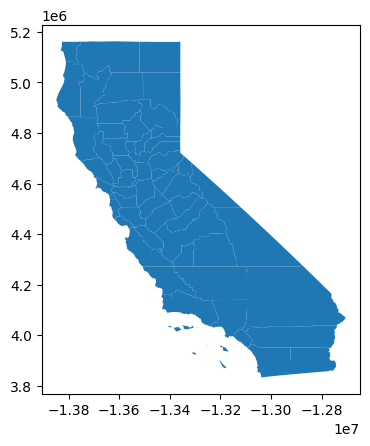

In [ ]:
cal_shp = gpd.read_file("/content/cnty19_1.shp")
cal_shp.plot()

In [ ]:
cal_shp.dtypes
cal_shp = cal_shp.rename(columns = {'COUNTY_NAM':'County'})

OBJECTID         int64
COUNTY_NAM      object
COUNTY_ABB      object
COUNTY_NUM       int64
COUNTY_COD      object
COUNTY_FIP      object
ISLAND          object
GlobalID        object
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [ ]:
cal_data = health_data[health_data['State'] == 'California']
cal_data = cal_data[['State','County','Adult smoking_% Smokers','Adult obesity_% Obese','Food environment index_Food Environment Index','Physical inactivity_% Physically Inactive','Access to exercise opportunities_% With Access']]

In [ ]:
cal_data.head()

State     County  Adult smoking_% Smokers  Adult obesity_% Obese  \
184  California    Alameda                     10.6                   20.5   
185  California     Alpine                      NaN                   23.5   
186  California     Amador                     21.2                   24.8   
187  California      Butte                     19.2                   24.4   
188  California  Calaveras                     19.1                   24.3   

     Food environment index_Food Environment Index  \
184                                            7.6   
185                                            6.5   
186                                            7.7   
187                                            6.4   
188                                            7.7   

     Physical inactivity_% Physically Inactive  \
184                                       15.0   
185                                       17.7   
186                                       17.2   
187                                       16.9   
188                                       17.6   

     Access to exercise opportunities_% With Access  
184                                       99.731240  
185                                      100.000000  
186                                       68.995301  
187                                       84.039091  
188                                       62.806617

In [ ]:
cal_data = cal_data.merge(cal_shp[['County','geometry']],on = 'County',how = 'left')

In [ ]:
cal_data_copy  = cal_data.copy()
del cal_data_copy['geometry']

In [ ]:
cal_datac = gpd.GeoDataFrame(cal_data,geometry = 'geometry')
cal_data = gpd.GeoDataFrame(cal_data,geometry = 'geometry')

<Axes: >

[]

[]

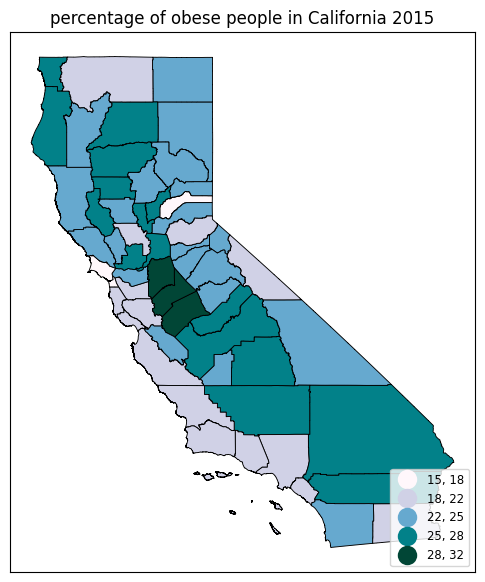

In [ ]:
# @title Obesity In California
fig, ax = plt.subplots(1, figsize=(6,10))
cal_datac.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.65,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people in California 2015")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [ ]:
cal_datac['geometry'] = cal_datac['geometry'].centroid

<Axes: >

<Axes: >

[]

[]

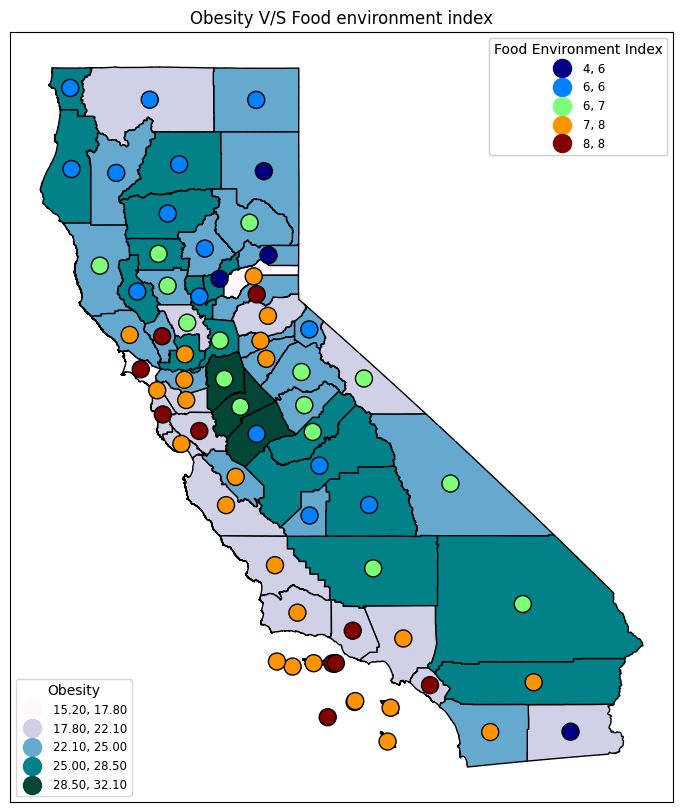

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,10))

cal_data.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Obesity''')

cal_datac.plot(ax=ax,column='Food environment index_Food Environment Index',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)

ax.title.set_text("Obesity V/S Food environment index")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Food Environment Index''')



ax.add_artist(l2)
ax.add_artist(l1)

From this map, we can say that Merced and Yuba has the poor food environment index and highest obesity

Placer and Solano has obesity percentage of 22.10 - 25.00 but its food environment index is very high.

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Obesity V/S Food Environment Index')

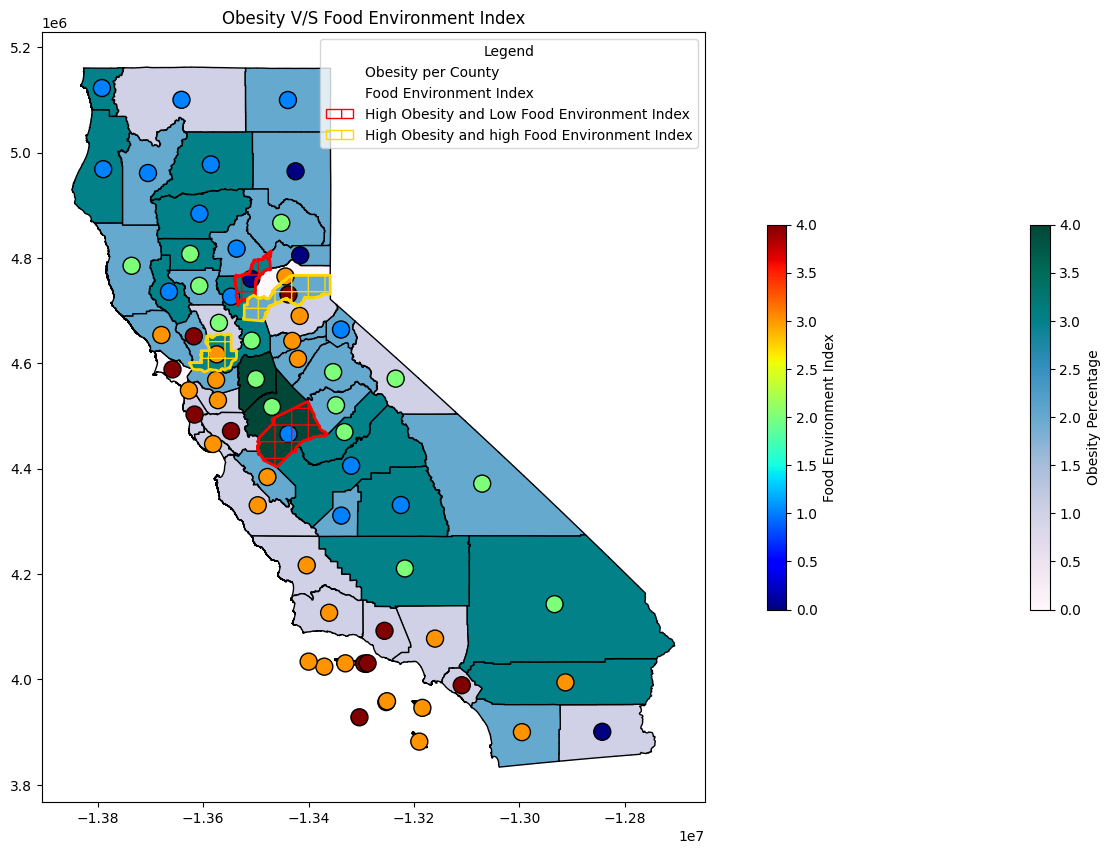

In [ ]:
import matplotlib.patches as mpatches

cal_datac_q = cal_data.query("County=='Merced' | County=='Yuba'")
cal_datac_e = cal_data.query("County=='Placer' | County=='Solano'")

fig, ax = plt.subplots(1,figsize=(20, 10))

cal_data.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
cal_datac.plot(ax=ax,column='Food environment index_Food Environment Index',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)
cal_datac_q.plot(ax=ax, edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax, edgecolor='gold', linewidth=2, facecolor="none", alpha=1, hatch='+')

legend_elements1 = [
    mpatches.Patch(color='none', label='Obesity per County'),
    mpatches.Patch(color='none', label='Food Environment Index'),
]
legend_elements1.append(mpatches.Patch(edgecolor='red', facecolor='none', hatch='+',
                                      label="High Obesity and Low Food Environment Index"))
legend_elements1.append(mpatches.Patch(edgecolor='gold', facecolor='none', hatch='+',
                                      label="High Obesity and high Food Environment Index"))

ax.set_title('Obesity V/S Food Environment Index')

ax.legend(handles=legend_elements1, loc='upper right', title="Legend")

cbar_obesity = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.5)
cbar_obesity.set_label("Obesity Percentage")

cbar_fei = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', shrink=0.5)
cbar_fei.set_label("Food Environment Index")


<Axes: >

<Axes: >

<Axes: >

<Axes: >

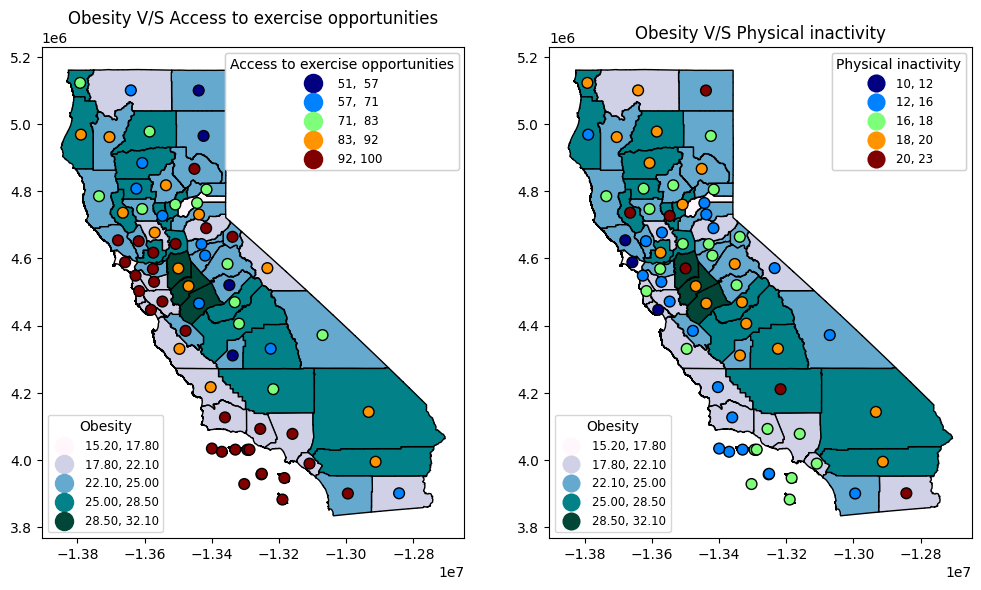

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,10))

cal_data.plot(ax=ax[0],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax[0].get_legend()
l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[0],column='Access to exercise opportunities_% With Access',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 60)

ax[0].title.set_text("Obesity V/S Access to exercise opportunities")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[0].get_legend()
l2.set_title('''Access to exercise opportunities''')



ax[0].add_artist(l2)
ax[0].add_artist(l1)

#Second Map
cal_data.plot(ax=ax[1],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.3})

l1 = ax[1].get_legend()
l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[1],column='Physical inactivity_% Physically Inactive',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.3},
         markersize = 60)

ax[1].title.set_text("Obesity V/S Physical inactivity")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[1].get_legend()
l2.set_title('''Physical inactivity''')



ax[1].add_artist(l2)
ax[1].add_artist(l1)

High Obesity and Low access to excercise opportunities: Merced, Tehama and Glenn

High Obesity and High Access to excercise opportunities: San Joaquin, Stanislaus, Sacramento

High Obesity and High Physical Inactivity: Merced, San Joaquin, Sacramento

High Obesity and low Physical Inactivity: Siskiyou, Imperial

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

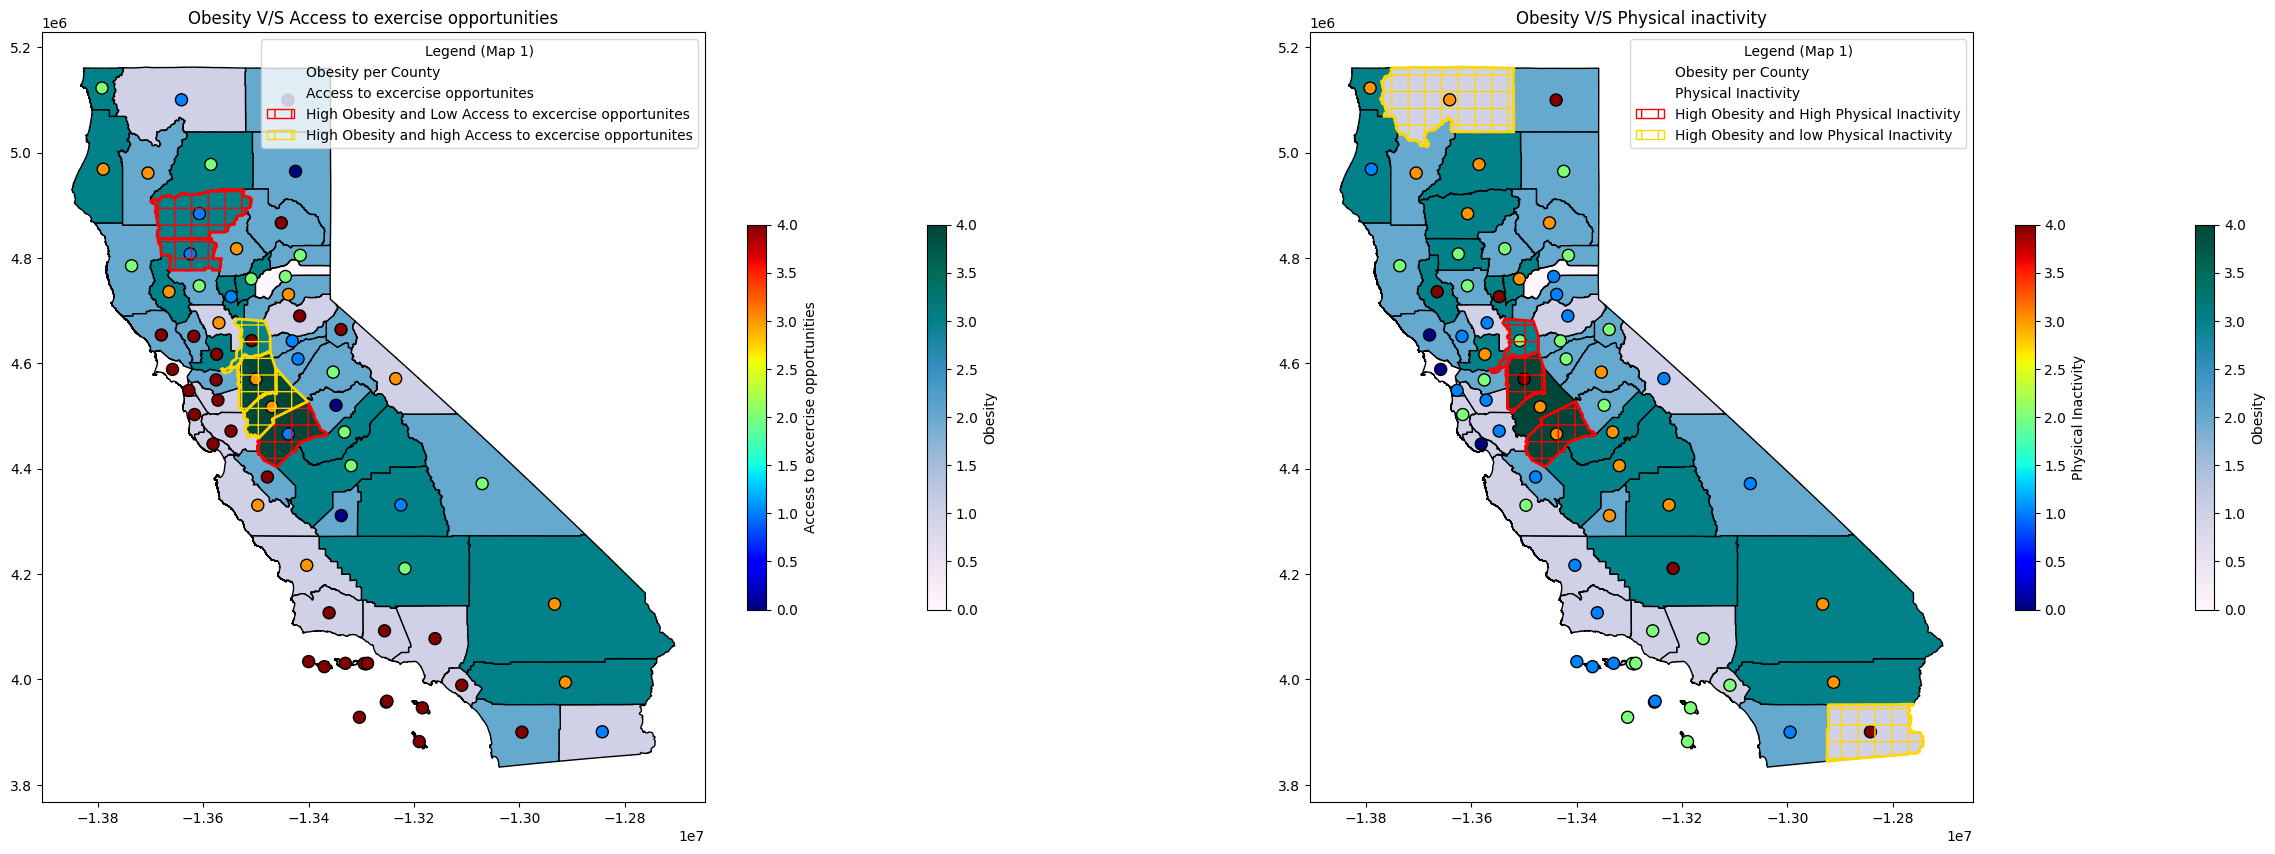

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

#first map
cal_datac_q = cal_data.query("County=='Merced' | County=='Tehama' | County=='Glenn' ")
cal_datac_e = cal_data.query("County=='San Joaquin' | County=='Stanislaus' | County=='Sacramento' ")
cal_data.plot(ax=ax[0],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#l1 = ax[0].get_legend()
#l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[0],column='Access to exercise opportunities_% With Access',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 75)
cal_datac_q.plot(ax=ax[0], edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax[0], edgecolor='gold', linewidth=2, facecolor="none", alpha=1, hatch='+')
legend_elements1 = [
    mpatches.Patch(color='none', label='Obesity per County'),
    mpatches.Patch(color='none', label='Access to excercise opportunites'),
]
legend_elements1.append(mpatches.Patch(edgecolor='red', facecolor='none', hatch='+',
                                      label="High Obesity and Low Access to excercise opportunites"))
legend_elements1.append(mpatches.Patch(edgecolor='gold', facecolor='none', hatch='+',
                                      label="High Obesity and high Access to excercise opportunites"))
ax[0].legend(handles=legend_elements1, loc='upper right', title="Legend (Map 1)")
ax[0].title.set_text("Obesity V/S Access to exercise opportunities")
#ax.set_xticks([]); ax.set_yticks([])

#l2 = ax[0].get_legend()
#l2.set_title('''Access to exercise opportunities''')



#ax[0].add_artist(l2)
#ax[0].add_artist(l1)

#Second Map
cal_datac_q = cal_data.query("County=='Merced' | County=='San Joaquin' | County=='Sacramento' ")
cal_datac_e = cal_data.query("County=='Siskiyou' | County=='Imperial'")
cal_data.plot(ax=ax[1],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.3})

#l1 = ax[1].get_legend()
#l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[1],column='Physical inactivity_% Physically Inactive',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.3},
         markersize = 75)
cal_datac_q.plot(ax=ax[1], edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax[1], edgecolor='gold', linewidth=2, facecolor="none", alpha=1, hatch='+')
legend_elements2 = [
    mpatches.Patch(color='none', label='Obesity per County'),
    mpatches.Patch(color='none', label='Physical Inactivity'),
]
legend_elements2.append(mpatches.Patch(edgecolor='red', facecolor='none', hatch='+',
                                      label="High Obesity and High Physical Inactivity"))
legend_elements2.append(mpatches.Patch(edgecolor='gold', facecolor='none', hatch='+',
                                      label="High Obesity and low Physical Inactivity"))
ax[1].legend(handles=legend_elements2, loc='upper right', title="Legend (Map 1)")
ax[0].title.set_text("Obesity V/S Access to exercise opportunities")
ax[1].title.set_text("Obesity V/S Physical inactivity")
#ax.set_xticks([]); ax.set_yticks([])

#l2 = ax[1].get_legend()
#l2.set_title('''Physical inactivity''')



#ax[1].add_artist(l2)
#ax[1].add_artist(l1)
cbar_obesity = plt.colorbar(ax[0].collections[0], ax=ax[0], orientation='vertical', shrink=0.5)
cbar_obesity.set_label("Obesity")

cbar_aeo = plt.colorbar(ax[0].collections[1], ax=ax[0], orientation='vertical', shrink=0.5)
cbar_aeo.set_label("Access to excercise opportunities")

cbar_obesity = plt.colorbar(ax[1].collections[0], ax=ax[1], orientation='vertical', shrink=0.5)
cbar_obesity.set_label("Obesity")

cbar_pi = plt.colorbar(ax[1].collections[1], ax=ax[1], orientation='vertical', shrink=0.5)
cbar_pi.set_label("Physical Inactivity")

In [ ]:
fig = px.scatter_matrix(cal_data_copy)
#fig.show()

In [ ]:
# Obesity & Physical Inactivity
fig = px.scatter(cal_data_copy, x="Adult obesity_% Obese", y="Physical inactivity_% Physically Inactive", color="Adult obesity_% Obese", width=1000, height=600)
fig.show()

In [ ]:
# Obesity & Access to excercise opportunities
fig = px.scatter(cal_data_copy, x="Adult obesity_% Obese", y="Access to exercise opportunities_% With Access", color="Adult obesity_% Obese", width=1000, height=600)
fig.show()

In [ ]:
# Obesity & Food Environment Index
fig = px.scatter(cal_data_copy, x="Adult obesity_% Obese", y="Food environment index_Food Environment Index", color="Adult obesity_% Obese", width=1000, height=600)
fig.show()

# PS3 Assignment


In [ ]:
# Grouping by 'COUNTY' and calculating the mean for each category
county_grouped = cal_data.groupby('County').mean().reset_index()

# Create a line plot with hover tooltips using Plotly Express
fig = px.line(county_grouped, x='County', y=['Physical inactivity_% Physically Inactive', 'Access to exercise opportunities_% With Access', 'Adult obesity_% Obese'],
              labels={'variable': 'Metrics', 'value': 'Values'}, title='Physical Inactivity and Access to Physical Exercise and Obesity by COUNTY')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better readability
fig.show()

<ipython-input-50-27659892ff49>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
! wget -q -O cal_sports.zip "https://drive.google.com/uc?export=download&id=1UBQf50pdOWMj-SilB_nPBtLCHBMTrCz8"
zip_ref = zipfile.ZipFile('cal_sports.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
cal_sports_data = '/content/united_states_california_sports_activities_point.geojson'
m = folium.Map(location = [36.7783, -119.4179], zoom_start= 6)
folium.GeoJson(cal_sports_data).add_to(m)
m.save('california_geojson_map_sports.html')

In [ ]:
gdf = gpd.read_file(cal_sports_data)
gdf.columns

Index(['gid', 'access', 'addr:housename', 'addr:housenumber', 'aeroway',
       'amenity', 'brand', 'building', 'covered', 'ele', 'highway', 'historic',
       'horse', 'landuse', 'leisure', 'man_made', 'name', 'natural',
       'operator', 'public_transport', 'ref', 'shop', 'sport', 'surface',
       'tourism', 'tower:type', 'waterway', 'width', 'geometry'],
      dtype='object')

In [ ]:
cal_data.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'geometry'],
      dtype='object')

In [ ]:
gdf.columns

Index(['gid', 'access', 'addr:housename', 'addr:housenumber', 'aeroway',
       'amenity', 'brand', 'building', 'covered', 'ele', 'highway', 'historic',
       'horse', 'landuse', 'leisure', 'man_made', 'name', 'natural',
       'operator', 'public_transport', 'ref', 'shop', 'sport', 'surface',
       'tourism', 'tower:type', 'waterway', 'width', 'geometry'],
      dtype='object')

In [ ]:
# Create your Folium map with the default tiles:
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Create a choropleth layer to highlight each county
folium.Choropleth(
    geo_data=cal_data,
    name='choropleth',
    data=cal_data_copy,
    columns=['County', 'Adult obesity_% Obese'],
    key_on='feature.properties.County',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Obesity'
).add_to(m)

# Save the Folium map with the choropleth layer
m.save('california_counties_choropleth_obesity.html')

# Create MarkerCluster for the GeoJSON data
marker_cluster = MarkerCluster().add_to(m)

# Add GeoJSON data to the MarkerCluster
for idx, row in gdf.iterrows():
    folium.Marker([row['geometry'].y, row['geometry'].x]).add_to(marker_cluster)

# Save the Folium map with MarkerClusters
m.save('california_geojson_map_sports_clustered_obesity.html')

"\n# Create your Folium map with the default tiles:\nm = folium.Map(location=[36.7783, -119.4179], zoom_start=6)\n\n# Create a choropleth layer to highlight each county\nfolium.Choropleth(\n    geo_data=cal_data,\n    name='choropleth',\n    data=cal_data_copy,\n    columns=['County', 'Adult obesity_% Obese'],\n    key_on='feature.properties.County',\n    fill_color='RdPu',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='Obesity'\n).add_to(m)\n\n# Save the Folium map with the choropleth layer\nm.save('california_counties_choropleth_obesity.html')\n\n# Create MarkerCluster for the GeoJSON data\nmarker_cluster = MarkerCluster().add_to(m)\n\n# Add GeoJSON data to the MarkerCluster\nfor idx, row in gdf.iterrows():\n    folium.Marker([row['geometry'].y, row['geometry'].x]).add_to(marker_cluster)\n\n# Save the Folium map with MarkerClusters\nm.save('california_geojson_map_sports_clustered_obesity.html')\n"

In [ ]:
#Please Uncomment the variable 'm' to see the folium map
#m

In [ ]:
from folium.plugins import MarkerCluster

# Create your Folium map with the default tiles:
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Create a choropleth layer to highlight each county
folium.Choropleth(
    geo_data=cal_data,
    name='choropleth',
    data=cal_data_copy,
    columns=['County', 'Adult obesity_% Obese'],
    key_on='feature.properties.County',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Obesity'
).add_to(m)

# Create MarkerCluster for the GeoJSON data
marker_cluster = MarkerCluster().add_to(m)

# Add GeoJSON data to the MarkerCluster with hover tooltip
for idx, row in gdf.iterrows():
    popup_text = f"Sport: {row['sport']}"  # Define the text for the tooltip
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=popup_text,  # Assign the tooltip text
    ).add_to(marker_cluster)

# Save the Folium map with MarkerClusters and hover tooltips
m.save('california_geojson_map_sports_clustered_obesity_with_hover.html')


'from folium.plugins import MarkerCluster\n\n# Create your Folium map with the default tiles:\nm = folium.Map(location=[36.7783, -119.4179], zoom_start=6)\n\n# Create a choropleth layer to highlight each county\nfolium.Choropleth(\n    geo_data=cal_data,\n    name=\'choropleth\',\n    data=cal_data_copy,\n    columns=[\'County\', \'Adult obesity_% Obese\'],\n    key_on=\'feature.properties.County\',\n    fill_color=\'RdPu\',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name=\'Obesity\'\n).add_to(m)\n\n# Create MarkerCluster for the GeoJSON data\nmarker_cluster = MarkerCluster().add_to(m)\n\n# Add GeoJSON data to the MarkerCluster with hover tooltip\nfor idx, row in gdf.iterrows():\n    popup_text = f"Sport: {row[\'sport\']}"  # Define the text for the tooltip\n    folium.Marker(\n        location=[row[\'geometry\'].y, row[\'geometry\'].x],\n        popup=popup_text,  # Assign the tooltip text\n    ).add_to(marker_cluster)\n\n# Save the Folium map with MarkerClusters and ho

In [ ]:
#m

In [ ]:
#Please uncomment the variable 'm' to see the folium map
from folium.plugins import HeatMap
# Create your Folium map with the default tiles:
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Create a choropleth layer to highlight each county
folium.Choropleth(
    geo_data=cal_data,
    name='choropleth',
    data=cal_data_copy,
    columns=['County', 'Physical inactivity_% Physically Inactive'],
    key_on='feature.properties.County',
    fill_color='RdYlBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Physical Inactivity'
).add_to(m)

# Save the Folium map with the choropleth layer
m.save('california_counties_choropleth_Physical_Inactivity.html')

# Create Heatmap Layer
heat_data = [[point.y, point.x] for point in gdf.geometry]
HeatMap(heat_data).add_to(m)

# Save the Folium map with MarkerClusters
m.save('california_geojson_map_sports_clustered_Physical_inactivity_heatmap.html')
#m

"\n#Please uncomment the variable 'm' to see the folium map\nfrom folium.plugins import HeatMap\n# Create your Folium map with the default tiles:\nm = folium.Map(location=[36.7783, -119.4179], zoom_start=6)\n\n# Create a choropleth layer to highlight each county\nfolium.Choropleth(\n    geo_data=cal_data,\n    name='choropleth',\n    data=cal_data_copy,\n    columns=['County', 'Physical inactivity_% Physically Inactive'],\n    key_on='feature.properties.County',\n    fill_color='RdYlBu',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='Physical Inactivity'\n).add_to(m)\n\n# Save the Folium map with the choropleth layer\nm.save('california_counties_choropleth_Physical_Inactivity.html')\n\n# Create Heatmap Layer\nheat_data = [[point.y, point.x] for point in gdf.geometry]\nHeatMap(heat_data).add_to(m)\n\n# Save the Folium map with MarkerClusters\nm.save('california_geojson_map_sports_clustered_Physical_inactivity_heatmap.html')\n#m\n"

In [ ]:
gdf_df = pd.DataFrame(gdf)
gdf_df['sport'] = gdf_df['sport'].str.split(';')
gdf_df = gdf_df.explode('sport')
# Count the occurrences of each entry after exploding the column
entry_counts = gdf_df['sport'].value_counts()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 30 Sports (Including Others)')

Text(0.5, 0, 'Counts')

Text(0, 0.5, 'Sports')

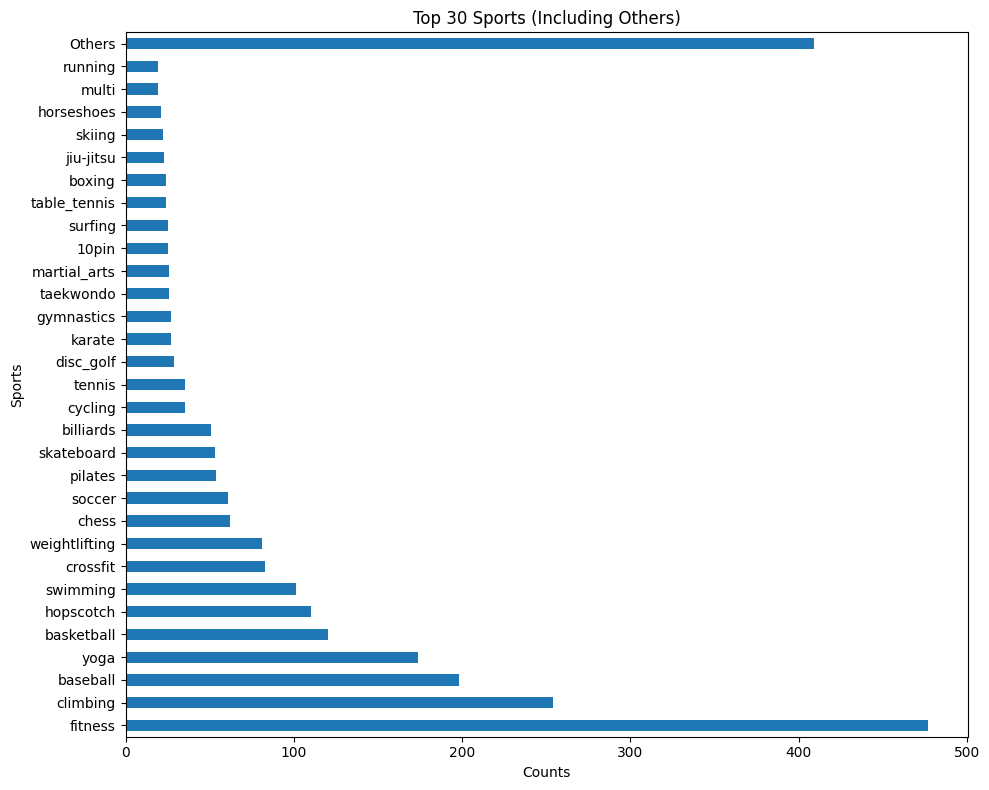

In [ ]:
# Assuming you have 'entry_counts' containing the counts of sports
entry_counts = gdf_df['sport'].value_counts()

# Sort the values in descending order
entry_counts_sorted = entry_counts.sort_values(ascending=False)

# Selecting top N sports (e.g., top 20)
top_n = 30
top_sports = entry_counts_sorted.head(top_n)

# Create an 'Others' category for less frequent sports
other_count = entry_counts_sorted.iloc[top_n:].sum()
top_sports['Others'] = other_count

# Plotting the top sports (including 'Others')
plt.figure(figsize=(10, 8))
top_sports.plot(kind='barh')
plt.title(f'Top {top_n} Sports (Including Others)')
plt.xlabel('Counts')
plt.ylabel('Sports')
plt.tight_layout()
plt.show()

# PS4 Assignment

In PS3, I compared obesity with factors such as food environment index, access to exercise opportunities, physical inactivity. Using the location of physical activities, I plotted a folium map.
From the map, I got to know why the obesity percentage is high or low for a county. Now for PS4, I am thinking about why the above factors are occurring in the counties. For that I am considering variables like poverty percentage, GDP, Median family income, Employment and unemployment rate per county and map correlation with obesity.

This csv file shows the unemployment and employment percentage across counties of California

In [ ]:
! wget -q -O unemployment_percentage.csv "https://drive.google.com/uc?export=download&id=1wlKqMDHzFVilgudbHMRm5ehluu5mItta"
df_unem = pd.read_csv("unemployment_percentage.csv")
df_unem['Area'] = df_unem['Area'].str.replace(' County','')
df_unem

Year  Period             Area Labor Force Employment Unemployment  \
0   2015  Annual          Alameda     819,000    779,900       39,100   
1   2015  Annual           Alpine         550        510           40   
2   2015  Annual           Amador      14,320     13,370          950   
3   2015  Annual            Butte     101,100     93,800        7,300   
4   2015  Annual        Calaveras      20,550     19,230        1,320   
5   2015  Annual           Colusa      11,050      9,340        1,710   
6   2015  Annual     Contra Costa     544,600    517,000       27,600   
7   2015  Annual        Del Norte       9,860      9,010          850   
8   2015  Annual        El Dorado      87,900     82,800        5,100   
9   2015  Annual           Fresno     440,300    395,200       45,100   
10  2015  Annual            Glenn      12,960     11,830        1,140   
11  2015  Annual         Humboldt      62,300     58,800        3,500   
12  2015  Annual         Imperial      76,800     57,900       18,900   
13  2015  Annual             Inyo       9,080      8,550          530   
14  2015  Annual             Kern     390,100    350,000       40,100   
15  2015  Annual            Kings      57,700     51,600        6,100   
16  2015  Annual             Lake      29,010     26,790        2,220   
17  2015  Annual           Lassen      10,760      9,980          780   
18  2015  Annual      Los Angeles   4,973,800  4,641,100      332,700   
19  2015  Annual           Madera      59,800     53,500        6,300   
20  2015  Annual            Marin     138,700    133,700        5,000   
21  2015  Annual         Mariposa       8,010      7,440          580   
22  2015  Annual        Mendocino      39,830     37,500        2,330   
23  2015  Annual           Merced     114,100    101,000       13,000   
24  2015  Annual            Modoc       3,300      3,020          280   
25  2015  Annual             Mono       8,240      7,730          510   
26  2015  Annual         Monterey     218,300    200,500       17,800   
27  2015  Annual             Napa      73,700     70,300        3,400   
28  2015  Annual           Nevada      48,010     45,390        2,620   
29  2015  Annual           Orange   1,584,300  1,513,100       71,200   
30  2015  Annual           Placer     176,300    167,400        9,000   
31  2015  Annual           Plumas       7,890      7,080          820   
32  2015  Annual        Riverside   1,033,500    963,800       69,600   
33  2015  Annual       Sacramento     684,600    643,300       41,300   
34  2015  Annual       San Benito      29,800     27,500        2,300   
35  2015  Annual   San Bernardino     919,300    859,700       59,600   
36  2015  Annual        San Diego   1,548,800  1,467,700       81,100   
37  2015  Annual    San Francisco     541,400    521,600       19,800   
38  2015  Annual      San Joaquin     314,400    286,300       28,100   
39  2015  Annual  San Luis Obispo     138,900    132,300        6,600   
40  2015  Annual        San Mateo     434,200    419,300       14,900   
41  2015  Annual    Santa Barbara     217,200    205,600       11,600   
42  2015  Annual      Santa Clara   1,012,200    970,000       42,300   
43  2015  Annual       Santa Cruz     143,200    132,400       10,800   
44  2015  Annual           Shasta      74,100     68,300        5,800   
45  2015  Annual           Sierra       1,360      1,240          120   
46  2015  Annual         Siskiyou      17,880     16,200        1,680   
47  2015  Annual           Solano     204,900    192,200       12,600   
48  2015  Annual           Sonoma     257,700    246,000       11,600   
49  2015  Annual       Stanislaus     241,000    218,000       23,000   
50  2015  Annual           Sutter      44,700     39,900        4,800   
51  2015  Annual           Tehama      25,020     23,030        1,990   
52  2015  Annual          Trinity       5,140      4,740          400   
53  2015  Annual           Tulare     202,100    178,500      

In [ ]:
import plotly.graph_objects as go
# Create the line trace
line_trace = go.Scatter(
    x=df_unem['Area'],
    y=df_unem['Unemployment Rate'],
    mode='lines',
    name='Unemployment Rate',
    line=dict(color='red')
)

# Create the layout
layout = go.Layout(
    title='Unemployment Rate per County',
    xaxis=dict(title='Area'),
    yaxis=dict(title='Rate'),
    legend=dict(x=0, y=1.0)
)

# Create the figure and add traces
fig = go.Figure(data=[line_trace], layout=layout)

# Show interactive plot
fig.show()


df_pov is the dataframe containing data of poverty percentage across counties of California
Poverty status is defined by family; **either everyone in the family is in poverty or no one in the family is in poverty**. The characteristics of the family used to determine the poverty threshold are: ***number of people, number of related children under 18, and whether or not the primary householder is over age 65.*** Family income is then compared to the poverty threshold; *if that family's income is below that threshold, the family is in poverty*.

In [ ]:
! wget -q -O poverty_percentage.csv "https://drive.google.com/uc?export=download&id=1CnjjH7DtUhhQlJTneOVQMgZnZuw3ITdc"
df_pov = pd.read_csv("poverty_percentage.csv")
df_pov = df_pov.loc[1:]
df_pov['County'] = df_pov['County'].str.replace(' County','')
df_pov = df_pov.rename(columns = {'Rank within US (of 3142 counties)': 'Poverty Rank within US (of 3142 counties)','Value (Percent)': 'Poverty %'})
df_pov

County   FIPS  Poverty %  Families (Below Poverty)  \
1        California   6000        8.7                    791378   
2          Imperial   6025       18.0                      6071   
3            Tulare   6107       16.4                     17845   
4            Merced   6047       16.3                     10093   
5            Fresno   6019       16.1                     36437   
6              Kern   6029       15.6                     31709   
7            Madera   6039       14.6                      5019   
8             Kings   6031       13.8                      4672   
9           Trinity   6105       12.9                       365   
10           Tehama   6103       12.6                      2096   
11             Yuba   6115       11.8                      2222   
12        Del Norte   6015       11.8                       734   
13            Modoc   6049       11.6                       258   
14             Lake   6033       11.6                      1862   
15        Mendocino   6045       11.5                      2390   
16   San Bernardino   6071       11.3                     56022   
17         Humboldt   6023       11.1                      3231   
18            Glenn   6021       10.8                       759   
19           Colusa   6011       10.8                       535   
20       Stanislaus   6099       10.6                     13882   
21           Sutter   6101       10.6                      2476   
22      San Joaquin   6077       10.5                     18516   
23            Butte   6007       10.5                      5366   
24           Lassen   6035       10.4                       640   
25      Los Angeles   6037       10.2                    226414   
26         Siskiyou   6093        9.9                      1088   
27        Calaveras   6009        9.8                      1212   
28       Sacramento   6067        9.6                     35387   
29        Riverside   6065        9.1                     49607   
30           Shasta   6089        9.0                      4180   
31         Monterey   6053        8.9                      8407   
32             Mono   6051        7.8                       253   
33         Mariposa   6043        7.7                       345   
34             Inyo   6027        7.5                       329   
35    Santa Barbara   6083        7.4                      7192   
36             Yolo   6113        7.3                      3529   
37        San Diego   6073        7.2                     54821   
38           Plumas   6063        7.0                       365   
39           Orange   6059        7.0                     52548   
40           Alpine   6003        6.3                        18   
41          Ventura   6111        6.2                     12278   
42           Solano   6095        6.2                      6768   
43  San Luis Obispo   6079        6.0                      4094   
44       San Benito   6069        5.9                       905   
45           Nevada   6057        5.9                      1540   
46        El Dorado   6017        5.9                      3062   
47       Santa Cruz   6087        5.9                      3595   
48     Contra Costa   6013        5.9                     17046   
49         Tuolumne   6109        5.7                       797   
50    San Francisco   6075        5.6                      9586   
51          Alameda   6001        5.5                     21336   
52             Napa   6055        5.1                      1715   
53           Sonoma   6097        5.1                      6108   
54           Placer   6061        4.8                      5071   
55           Amador   6005        4.4                       436   
56      Santa Clara   6085        4.0                     18560   
57        San Mateo   6081        3.8                      7092   
58            Marin   6041        3.8                      2471   
59           Sierra   6091        3.2                       

California ranks 31 of 52 states in poverty

In [ ]:
fig = px.box(df_pov,y='Poverty %', title='Percentage of Poverty by County')

# Show the interactive box plot
fig.show()

In [ ]:
! wget -q -O cali_gdp.xlsx "https://drive.google.com/uc?export=download&id=1GSWwjYg-ibvs2i7eebxsYJHJ7DOw9GJH"
df_gdp = pd.read_excel("cali_gdp.xlsx")
df_gdp

GeoFips          GeoName                                   Description  \
0      6000       California  Real GDP (thousands of chained 2012 dollars)   
1      6001          Alameda  Real GDP (thousands of chained 2012 dollars)   
2      6003           Alpine  Real GDP (thousands of chained 2012 dollars)   
3      6005           Amador  Real GDP (thousands of chained 2012 dollars)   
4      6007            Butte  Real GDP (thousands of chained 2012 dollars)   
5      6009        Calaveras  Real GDP (thousands of chained 2012 dollars)   
6      6011           Colusa  Real GDP (thousands of chained 2012 dollars)   
7      6013     Contra Costa  Real GDP (thousands of chained 2012 dollars)   
8      6015        Del Norte  Real GDP (thousands of chained 2012 dollars)   
9      6017        El Dorado  Real GDP (thousands of chained 2012 dollars)   
10     6019           Fresno  Real GDP (thousands of chained 2012 dollars)   
11     6021            Glenn  Real GDP (thousands of chained 2012 dollars)   
12     6023         Humboldt  Real GDP (thousands of chained 2012 dollars)   
13     6025         Imperial  Real GDP (thousands of chained 2012 dollars)   
14     6027             Inyo  Real GDP (thousands of chained 2012 dollars)   
15     6029             Kern  Real GDP (thousands of chained 2012 dollars)   
16     6031            Kings  Real GDP (thousands of chained 2012 dollars)   
17     6033             Lake  Real GDP (thousands of chained 2012 dollars)   
18     6035           Lassen  Real GDP (thousands of chained 2012 dollars)   
19     6037      Los Angeles  Real GDP (thousands of chained 2012 dollars)   
20     6039           Madera  Real GDP (thousands of chained 2012 dollars)   
21     6041            Marin  Real GDP (thousands of chained 2012 dollars)   
22     6043         Mariposa  Real GDP (thousands of chained 2012 dollars)   
23     6045        Mendocino  Real GDP (thousands of chained 2012 dollars)   
24     6047           Merced  Real GDP (thousands of chained 2012 dollars)   
25     6049            Modoc  Real GDP (thousands of chained 2012 dollars)   
26     6051             Mono  Real GDP (thousands of chained 2012 dollars)   
27     6053         Monterey  Real GDP (thousands of chained 2012 dollars)   
28     6055             Napa  Real GDP (thousands of chained 2012 dollars)   
29     6057           Nevada  Real GDP (thousands of chained 2012 dollars)   
30     6059           Orange  Real GDP (thousands of chained 2012 dollars)   
31     6061           Placer  Real GDP (thousands of chained 2012 dollars)   
32     6063           Plumas  Real GDP (thousands of chained 2012 dollars)   
33     6065        Riverside  Real GDP (thousands of chained 2012 dollars)   
34     6067       Sacramento  Real GDP (thousands of chained 2012 dollars)   
35     6069       San Benito  Real GDP (thousands of chained 2012 dollars)   
36     6071   San Bernardino  Real GDP (thousands of chained 2012 dollars)   
37     6073        San Diego  Real GDP (thousands of chained 2012 dollars)   
38     6075    San Francisco  Real GDP (thousands of chained 2012 dollars)   
39     6077      San Joaquin  Real GDP (thousands of chained 2012 dollars)   
40     6079  San Luis Obispo  Real GDP (thousands of chained 2012 dollars)   
41     6081        San Mateo  Real GDP (thousands of chained 2012 dollars)   
42     6083    Santa Barbara  Real GDP (thousands of chained 2012 dollars)   
43     6085      Santa Clara  Real GDP (thousands of chained 2012 dollars)   
44     6087       Santa Cruz  Real GDP (thousands of chained 2012 dollars)   
45     6089           Shasta  Real GDP (thousands of chained 2012 dollars)   
46     6091           Sierra  Real GDP (thousands of chained 2012 dollars)   
47     6093         Siskiyou  Real GDP (thousands of chained 2012 dollars)   
48     6095           Solano  Real GDP (thousands of chained 2012 dollars)   
49     6097           Sonoma  Real GDP (thousands of chained 2012 dollars)   
50     6099       Stanisla

In [ ]:
df_gdp['2015 GDP %'] = round(df_gdp['2015'] * 100 /df_gdp['2015'][0],4)

In [ ]:
df_gdp.head()

GeoFips     GeoName                                   Description  \
0     6000  California  Real GDP (thousands of chained 2012 dollars)   
1     6001     Alameda  Real GDP (thousands of chained 2012 dollars)   
2     6003      Alpine  Real GDP (thousands of chained 2012 dollars)   
3     6005      Amador  Real GDP (thousands of chained 2012 dollars)   
4     6007       Butte  Real GDP (thousands of chained 2012 dollars)   

         2015  2015 GDP %  
0  2357452911    100.0000  
1   109421599      4.6415  
2      100790      0.0043  
3     1445500      0.0613  
4     7600549      0.3224

<Figure size 1000x2000 with 0 Axes>

<BarContainer object of 58 artists>

Text(0.5, 0, 'Contribution to California GDP (%)')

Text(0.5, 1.0, 'Contribution of Counties to California GDP')

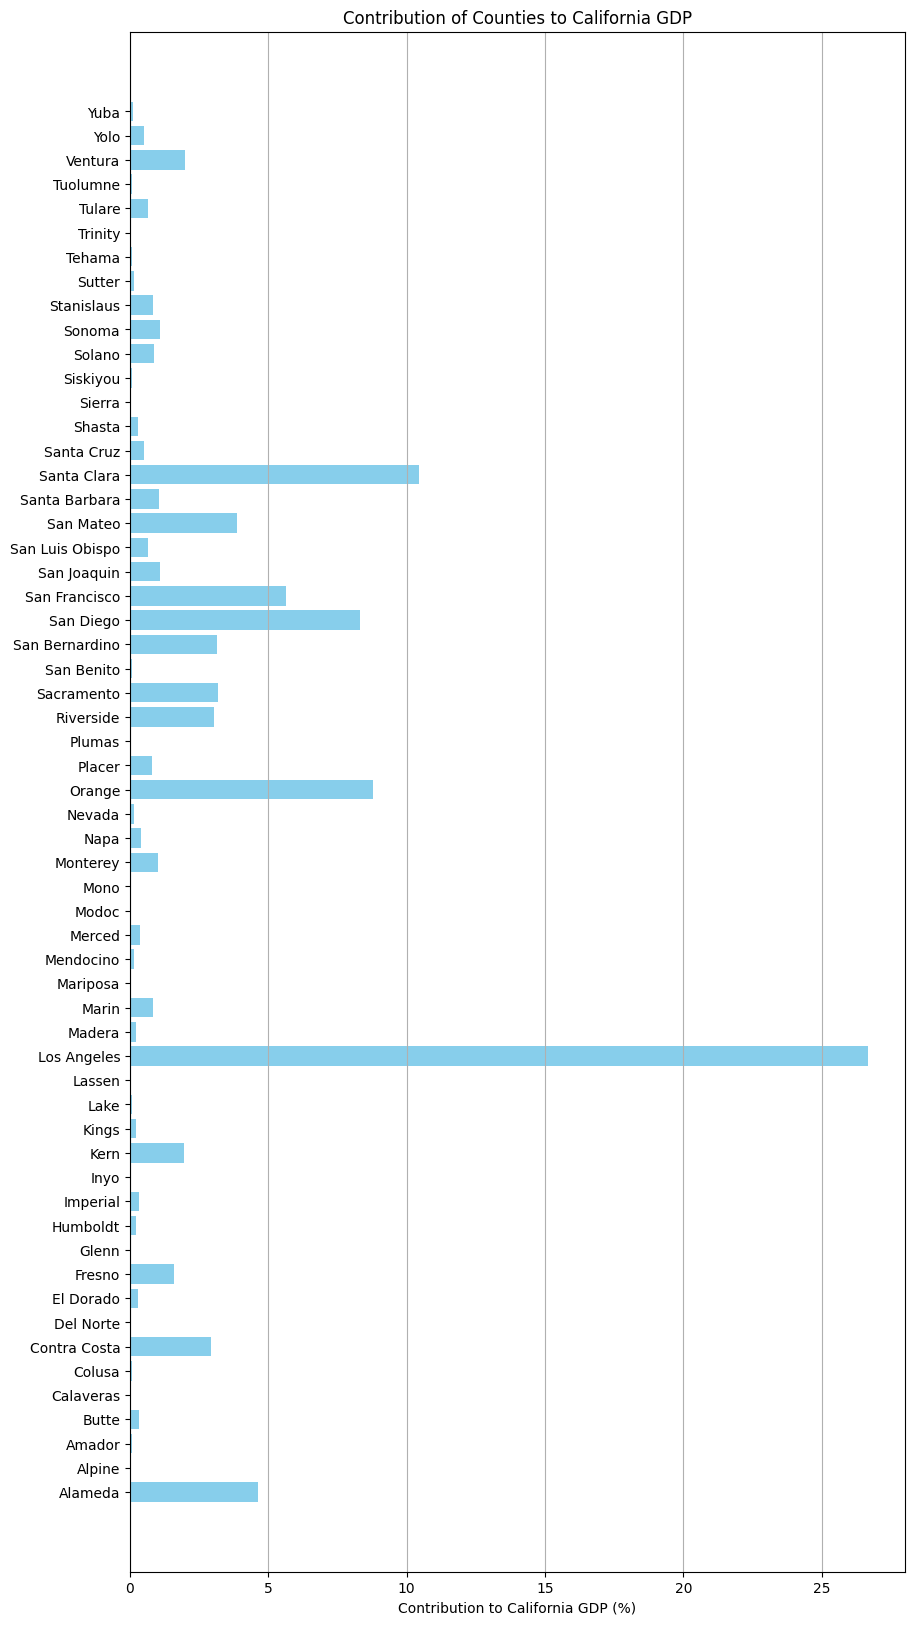

In [ ]:
plt.figure(figsize=(10, 20))
plt.barh(df_gdp['GeoName'].loc[1:], df_gdp['2015 GDP %'].loc[1:], color='skyblue')
plt.xlabel('Contribution to California GDP (%)')
plt.title('Contribution of Counties to California GDP')
plt.grid(axis='x')

plt.show()

In [ ]:
fig = px.bar(y = df_gdp['GeoName'].loc[1:],x = df_gdp['2015 GDP %'].loc[1:], orientation='h', labels={'x': 'Contribution to California GDP (%)', 'y': 'County'},
             title='Contribution of Counties to California GDP')
fig.update_traces(marker_color='skyblue')

# Show the interactive plot
fig.show()

In [ ]:
! wget -q -O cali_income.xlsx "https://drive.google.com/uc?export=download&id=1uex_KGdBvCD5Ny0PW9Lq8lGsz02cSz6I"
df_perincome = pd.read_excel("cali_income.xlsx")
df_perincome = df_perincome.rename(columns = {'percentage_diff':'% per capita income diff between california and counties'})
df_perincome

GeoFips          GeoName                             Description    2015  \
0      6000       California  Per capita personal income (dollars) 2   53817   
1      6001          Alameda  Per capita personal income (dollars) 2   61618   
2      6003           Alpine  Per capita personal income (dollars) 2   63924   
3      6005           Amador  Per capita personal income (dollars) 2   39764   
4      6007            Butte  Per capita personal income (dollars) 2   39352   
5      6009        Calaveras  Per capita personal income (dollars) 2   42659   
6      6011           Colusa  Per capita personal income (dollars) 2   39272   
7      6013     Contra Costa  Per capita personal income (dollars) 2   67056   
8      6015        Del Norte  Per capita personal income (dollars) 2   33072   
9      6017        El Dorado  Per capita personal income (dollars) 2   58818   
10     6019           Fresno  Per capita personal income (dollars) 2   38296   
11     6021            Glenn  Per capita personal income (dollars) 2   38924   
12     6023         Humboldt  Per capita personal income (dollars) 2   40594   
13     6025         Imperial  Per capita personal income (dollars) 2   36121   
14     6027             Inyo  Per capita personal income (dollars) 2   50961   
15     6029             Kern  Per capita personal income (dollars) 2   36532   
16     6031            Kings  Per capita personal income (dollars) 2   32733   
17     6033             Lake  Per capita personal income (dollars) 2   35796   
18     6035           Lassen  Per capita personal income (dollars) 2   31092   
19     6037      Los Angeles  Per capita personal income (dollars) 2   53067   
20     6039           Madera  Per capita personal income (dollars) 2   34323   
21     6041            Marin  Per capita personal income (dollars) 2  109274   
22     6043         Mariposa  Per capita personal income (dollars) 2   43701   
23     6045        Mendocino  Per capita personal income (dollars) 2   41701   
24     6047           Merced  Per capita personal income (dollars) 2   35167   
25     6049            Modoc  Per capita personal income (dollars) 2   42461   
26     6051             Mono  Per capita personal income (dollars) 2   44056   
27     6053         Monterey  Per capita personal income (dollars) 2   49757   
28     6055             Napa  Per capita personal income (dollars) 2   62781   
29     6057           Nevada  Per capita personal income (dollars) 2   53134   
30     6059           Orange  Per capita personal income (dollars) 2   59242   
31     6061           Placer  Per capita personal income (dollars) 2   58519   
32     6063           Plumas  Per capita personal income (dollars) 2   44091   
33     6065        Riverside  Per capita personal income (dollars) 2   36590   
34     6067       Sacramento  Per capita personal income (dollars) 2   45866   
35     6069       San Benito  Per capita personal income (dollars) 2   44028   
36     6071   San Bernardino  Per capita personal income (dollars) 2   35179   
37     6073        San Diego  Per capita personal income (dollars) 2   53357   
38     6075    San Francisco  Per capita personal income (dollars) 2  103625   
39     6077      San Joaquin  Per capita personal income (dollars) 2   38463   
40     6079  San Luis Obispo  Per capita personal income (dollars) 2   49914   
41     6081        San Mateo  Per capita personal income (dollars) 2   99076   
42     6083    Santa Barbara  Per capita personal income (dollars) 2   54318   
43     6085      Santa Clara  Per capita personal income (dollars) 2   83773   
44     6087       Santa Cruz  Per capita personal income (dollars) 2   56902   
45     6089           Shasta  Per capita personal income (dollars) 2   40252   
46     6091           Sierra  Per capita personal income (dollars) 2   36501   
47     6093         Siskiyou  Per capita personal income (dollars) 2   39585   
48     6095           Solano  Per capita personal income (dollars) 2   43597   
49  

In [ ]:
df_perincome.columns

Index([                                                 'GeoFips',
                                                        'GeoName',
                                                    'Description',
                                                             2015,
       '% per capita income diff between california and counties'],
      dtype='object')

percentage_diff column shows the percentage difference betweeen the per capita personal income of california and it's counties

In [ ]:
! wget -q -O cali_median_income.csv "https://drive.google.com/uc?export=download&id=1e2Ow4UZzLLmwau4uErIx68TDRzi7Kimc"
df_medincome = pd.read_csv("cali_median_income.csv")
df_medincome['County'] = df_medincome['County'].str.replace(' County','')
df_medincome = df_medincome.loc[1:]
df_medincome['% difference in median income'] = round((df_medincome['Value (Dollars)'] - df_medincome['Value (Dollars)'].iloc[0])*100/df_medincome['Value (Dollars)'].iloc[0],2)
df_medincome

County   FIPS  Value (Dollars)  \
1        California   6000            95971   
2           Trinity   6105            53850   
3             Modoc   6049            56225   
4          Imperial   6025            56301   
5            Tulare   6107            60187   
6          Siskiyou   6093            62037   
7          Mariposa   6043            63467   
8         Del Norte   6015            64156   
9            Merced   6047            64175   
10             Kern   6029            64828   
11            Kings   6031            65338   
12           Tehama   6103            65819   
13           Sierra   6091            66471   
14           Lassen   6035            68174   
15           Fresno   6019            68681   
16            Glenn   6021            69308   
17           Madera   6039            70576   
18             Yuba   6115            71561   
19        Mendocino   6045            71627   
20             Lake   6033            72279   
21         Humboldt   6023            73559   
22           Colusa   6011            74668   
23           Plumas   6063            74696   
24       Stanislaus   6099            75348   
25           Shasta   6089            75918   
26             Inyo   6027            76111   
27            Butte   6007            76651   
28   San Bernardino   6071            77516   
29           Sutter   6101            77580   
30      San Joaquin   6077            82719   
31             Mono   6051            85375   
32        Calaveras   6009            85798   
33      Los Angeles   6037            85834   
34        Riverside   6065            86562   
35         Tuolumne   6109            87073   
36         Monterey   6053            87292   
37       Sacramento   6067            88841   
38           Amador   6005            90176   
39           Nevada   6057            95257   
40    Santa Barbara   6083            95979   
41        San Diego   6073           101902   
42           Solano   6095           101019   
43             Yolo   6113           102595   
44  San Luis Obispo   6079           103670   
45       San Benito   6069           105990   
46          Ventura   6111           106425   
47           Alpine   6003           107115   
48           Sonoma   6097           109419   
49        El Dorado   6017           112624   
50             Napa   6055           112984   
51           Orange   6059           113249   
52       Santa Cruz   6087           118979   
53           Placer   6061           119457   
54     Contra Costa   6013           127279   
55          Alameda   6001           134985   
56    San Francisco   6075           147176   
57        San Mateo   6081           159133   
58      Santa Clara   6085           159872   
59            Marin   6041           170253   

    Rank within US (of 3141 counties)  % difference in median income  
1                                  13                           0.00  
2                                2812                         -43.89  
3                                2674                         -41.41  
4                                2667                         -41.34  
5                                2430                         -37.29  
6                                2295                         -35.36  
7                                2174                         -33.87  
8                                2126                         -33.15  
9                                2122                         -33.13  
10                               2056                         -32.45  
11                               2020                         -31.92  
12                               1972                         -31.42  
13                               1916                         -30.74  
14                               1773                         -28.96  
15                               1729                         -28.44  
16                               1670                   

Population Data 2015 of California County level

In [ ]:
! wget -q -O cali_population.xlsx "https://drive.google.com/uc?export=download&id=1sqnCxE4m7_rHrubv_Wjhz7d056X2Rn4C"
df_pop = pd.read_excel("cali_population.xlsx")
df_pop['County'] = df_pop['County'].str.replace(' County','')
df_pop = df_pop.rename(columns = {2015: 'Population 2015'})
df_pop.head()

County  Population 2015
0    Alameda          1634538
1     Alpine             1077
2     Amador            37031
3      Butte           224631
4  Calaveras            44965

In [ ]:
cal_datac.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'geometry'],
      dtype='object')

In [ ]:
gdp_map = pd.merge(cal_datac, df_gdp[['GeoName','2015']], left_on = 'County', right_on = 'GeoName', how = 'left')
gdp_map2 = pd.merge(cal_data, df_gdp[['GeoName','2015']], left_on = 'County', right_on = 'GeoName', how = 'left')

In [ ]:
cal_data.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'geometry'],
      dtype='object')

<Axes: >

<Axes: >

[]

[]

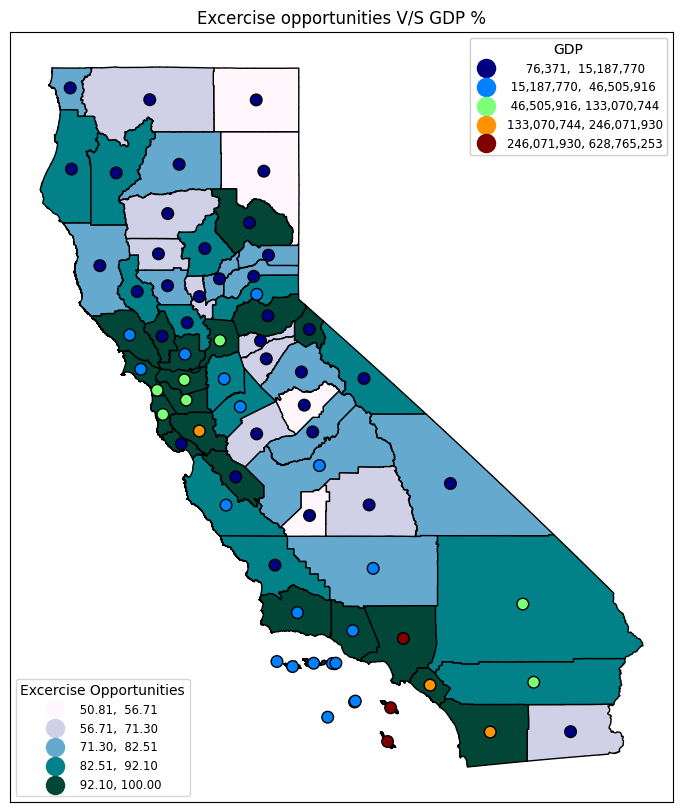

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,10))

cal_data.plot(ax=ax,column='Access to exercise opportunities_% With Access',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Excercise Opportunities''')

gdp_map.plot(ax=ax,column='2015',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 70)

ax.title.set_text("Excercise opportunities V/S GDP %")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''GDP''')



ax.add_artist(l2)
ax.add_artist(l1)

In [ ]:
income_map = pd.merge(cal_datac, df_perincome[['GeoName',2015]], left_on = 'County', right_on = 'GeoName', how = 'left')
income_map.head()

State     County  Adult smoking_% Smokers  Adult obesity_% Obese  \
0  California    Alameda                     10.6                   20.5   
1  California     Alpine                      NaN                   23.5   
2  California     Amador                     21.2                   24.8   
3  California      Butte                     19.2                   24.4   
4  California  Calaveras                     19.1                   24.3   

   Food environment index_Food Environment Index  \
0                                            7.6   
1                                            6.5   
2                                            7.7   
3                                            6.4   
4                                            7.7   

   Physical inactivity_% Physically Inactive  \
0                                       15.0   
1                                       17.7   
2                                       17.2   
3                                       16.9   
4                                       17.6   

   Access to exercise opportunities_% With Access  \
0                                       99.731240   
1                                      100.000000   
2                                       68.995301   
3                                       84.039091   
4                                       62.806617   

                            geometry    GeoName   2015  
0  POINT (-13571927.058 4530192.656)    Alameda  61618  
1  POINT (-13338326.818 4664290.104)     Alpine  63924  
2  POINT (-13430813.719 4642691.030)     Amador  39764  
3  POINT (-13536522.366 4817781.909)      Butte  39352  
4  POINT (-13419953.695 4608497.372)  Calaveras  42659

<Axes: >

<Axes: >

[]

[]

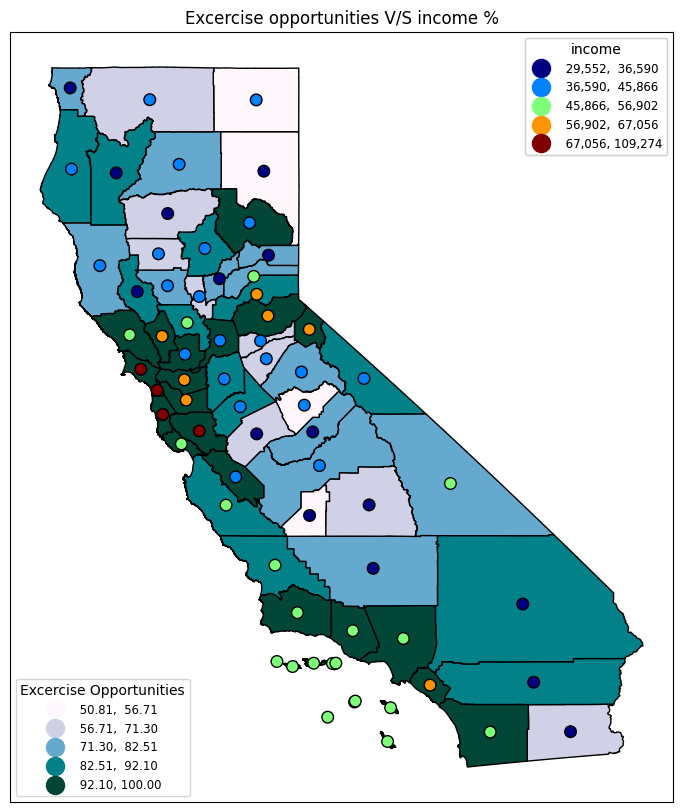

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,10))

cal_data.plot(ax=ax,column='Access to exercise opportunities_% With Access',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Excercise Opportunities''')

income_map.plot(ax=ax,column=2015,legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 70)

ax.title.set_text("Excercise opportunities V/S income %")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''income''')



ax.add_artist(l2)
ax.add_artist(l1)

<Axes: >

<Axes: >

[]

[]

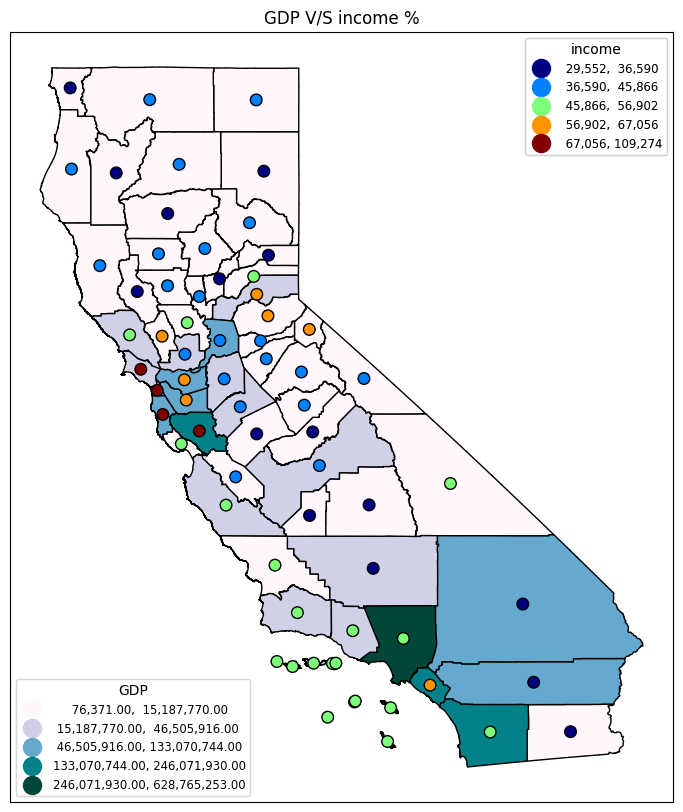

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,10))

gdp_map2.plot(ax=ax,column='2015',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''GDP''')

income_map.plot(ax=ax,column=2015,legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 70)

ax.title.set_text("GDP V/S income %")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''income''')



ax.add_artist(l2)
ax.add_artist(l1)

In [ ]:
unem_map = pd.merge(cal_datac,df_unem[['Area','Unemployment Rate','Employment Rate']], left_on = 'County', right_on = 'Area', how = 'left')
unem_map.head()

State     County  Adult smoking_% Smokers  Adult obesity_% Obese  \
0  California    Alameda                     10.6                   20.5   
1  California     Alpine                      NaN                   23.5   
2  California     Amador                     21.2                   24.8   
3  California      Butte                     19.2                   24.4   
4  California  Calaveras                     19.1                   24.3   

   Food environment index_Food Environment Index  \
0                                            7.6   
1                                            6.5   
2                                            7.7   
3                                            6.4   
4                                            7.7   

   Physical inactivity_% Physically Inactive  \
0                                       15.0   
1                                       17.7   
2                                       17.2   
3                                       16.9   
4                                       17.6   

   Access to exercise opportunities_% With Access  \
0                                       99.731240   
1                                      100.000000   
2                                       68.995301   
3                                       84.039091   
4                                       62.806617   

                            geometry       Area  Unemployment Rate  \
0  POINT (-13571927.058 4530192.656)    Alameda                4.8   
1  POINT (-13338326.818 4664290.104)     Alpine                7.3   
2  POINT (-13430813.719 4642691.030)     Amador                6.6   
3  POINT (-13536522.366 4817781.909)      Butte                7.2   
4  POINT (-13419953.695 4608497.372)  Calaveras                6.4   

   Employment Rate  
0             95.2  
1             92.7  
2             93.4  
3             92.8  
4             93.6

<Axes: >

<Axes: >

[]

[]

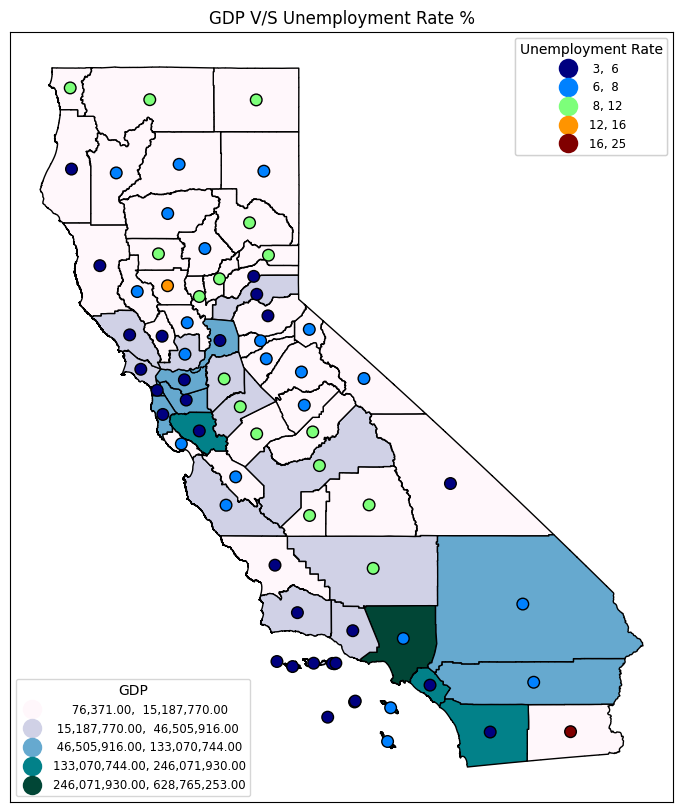

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,10))

gdp_map2.plot(ax=ax,column='2015',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''GDP''')

unem_map.plot(ax=ax,column='Unemployment Rate',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 70)

ax.title.set_text("GDP V/S Unemployment Rate %")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Unemployment Rate''')



ax.add_artist(l2)
ax.add_artist(l1)

<Axes: >

<Axes: >

[]

[]

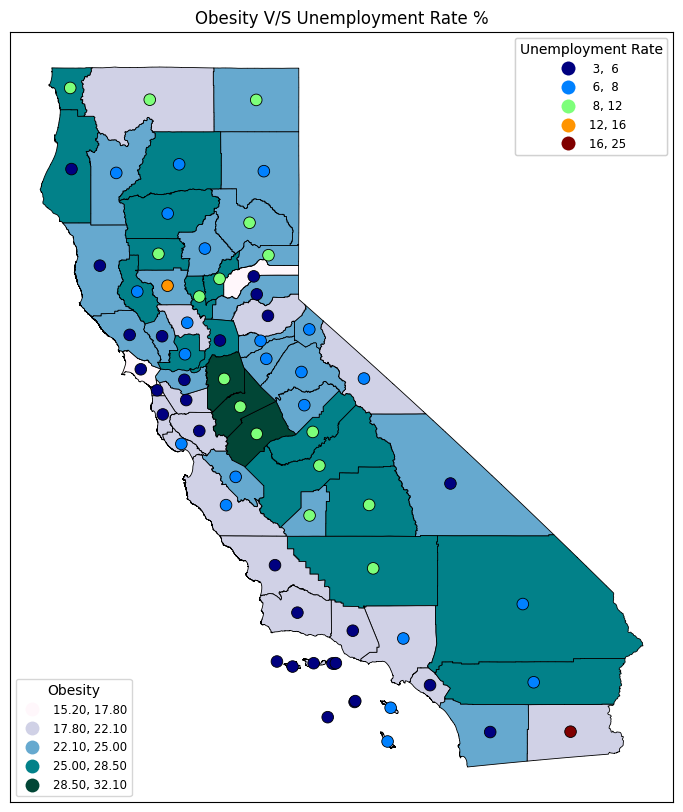

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,10))

gdp_map2.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.6,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.0})

l1 = ax.get_legend()
l1.set_title('''Obesity''')

unem_map.plot(ax=ax,column='Unemployment Rate',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.6,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.0},
         markersize = 70)

ax.title.set_text("Obesity V/S Unemployment Rate %")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Unemployment Rate''')



ax.add_artist(l2)
ax.add_artist(l1)

In [ ]:
cal_data_copy.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access'],
      dtype='object')

In [ ]:
cal_datac.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'geometry'],
      dtype='object')

In [ ]:
df_perincome.head()

GeoFips     GeoName                             Description   2015  \
0     6000  California  Per capita personal income (dollars) 2  53817   
1     6001     Alameda  Per capita personal income (dollars) 2  61618   
2     6003      Alpine  Per capita personal income (dollars) 2  63924   
3     6005      Amador  Per capita personal income (dollars) 2  39764   
4     6007       Butte  Per capita personal income (dollars) 2  39352   

   % per capita income diff between california and counties  
0                                           0.000000         
1                                          14.495420         
2                                          18.780311         
3                                         -26.112567         
4                                         -26.878124

In [ ]:
corr = pd.merge(cal_data_copy, df_unem[['Area','Unemployment Rate','Labor Force']], left_on = ['County'], right_on = ['Area'], how = 'left')
corr = pd.merge(corr, df_gdp[['GeoName','Description','2015 GDP %']], left_on = ['County'], right_on = ['GeoName'], how = 'left')
del corr['GeoName']
corr = corr.merge(df_medincome[['County','% difference in median income','Rank within US (of 3141 counties)']],on = ['County'], how = 'left')
corr = corr.merge(df_pov[['County','Poverty %','Poverty Rank within US (of 3142 counties)']],on = ['County'], how = 'left')
corr = pd.merge(corr, df_perincome[['GeoName','Description','% per capita income diff between california and counties']], left_on = ['County'], right_on = ['GeoName'], how = 'left')
corr = corr.merge(df_pop, on = ['County'], how = 'left')
del corr['GeoName']
del corr['Area']
corr.head()

State     County  Adult smoking_% Smokers  Adult obesity_% Obese  \
0  California    Alameda                     10.6                   20.5   
1  California     Alpine                      NaN                   23.5   
2  California     Amador                     21.2                   24.8   
3  California      Butte                     19.2                   24.4   
4  California  Calaveras                     19.1                   24.3   

   Food environment index_Food Environment Index  \
0                                            7.6   
1                                            6.5   
2                                            7.7   
3                                            6.4   
4                                            7.7   

   Physical inactivity_% Physically Inactive  \
0                                       15.0   
1                                       17.7   
2                                       17.2   
3                                       16.9   
4                                       17.6   

   Access to exercise opportunities_% With Access  Unemployment Rate  \
0                                       99.731240                4.8   
1                                      100.000000                7.3   
2                                       68.995301                6.6   
3                                       84.039091                7.2   
4                                       62.806617                6.4   

  Labor Force                                 Description_x  2015 GDP %  \
0     819,000  Real GDP (thousands of chained 2012 dollars)      4.6415   
1         550  Real GDP (thousands of chained 2012 dollars)      0.0043   
2      14,320  Real GDP (thousands of chained 2012 dollars)      0.0613   
3     101,100  Real GDP (thousands of chained 2012 dollars)      0.3224   
4      20,550  Real GDP (thousands of chained 2012 dollars)      0.0490   

   % difference in median income  Rank within US (of 3141 counties)  \
0                          40.65                                 25   
1                          11.61                                147   
2                          -6.04                                393   
3                         -20.13                               1061   
4                         -10.60                                552   

   Poverty %  Poverty Rank within US (of 3142 counties)  \
0        5.5                                      508.0   
1        6.3                                      713.0   
2        4.4                                      267.0   
3       10.5                                     1886.0   
4        9.8                                     1730.0   

                            Description_y  \
0  Per capita personal income (dollars) 2   
1  Per capita personal income (dollars) 2   
2  Per capita personal income (dollars) 2   
3  Per capita personal income (dollars) 2   
4  Per capita personal income (dollars) 2   

   % per capita income diff between california and counties  Population 2015  
0                                          14.495420                 1634538  
1                                          18.780311                    1077  
2                                         -26.112567                   37031  
3                                         -26.878124                  224631  
4                                         -20.733226                   44965

In [ ]:
corr.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'Unemployment Rate',
       'Labor Force', 'Description_x', '2015 GDP %',
       '% difference in median income', 'Rank within US (of 3141 counties)',
       'Poverty %', 'Poverty Rank within US (of 3142 counties)',
       'Description_y',
       '% per capita income diff between california and counties',
       'Population 2015'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

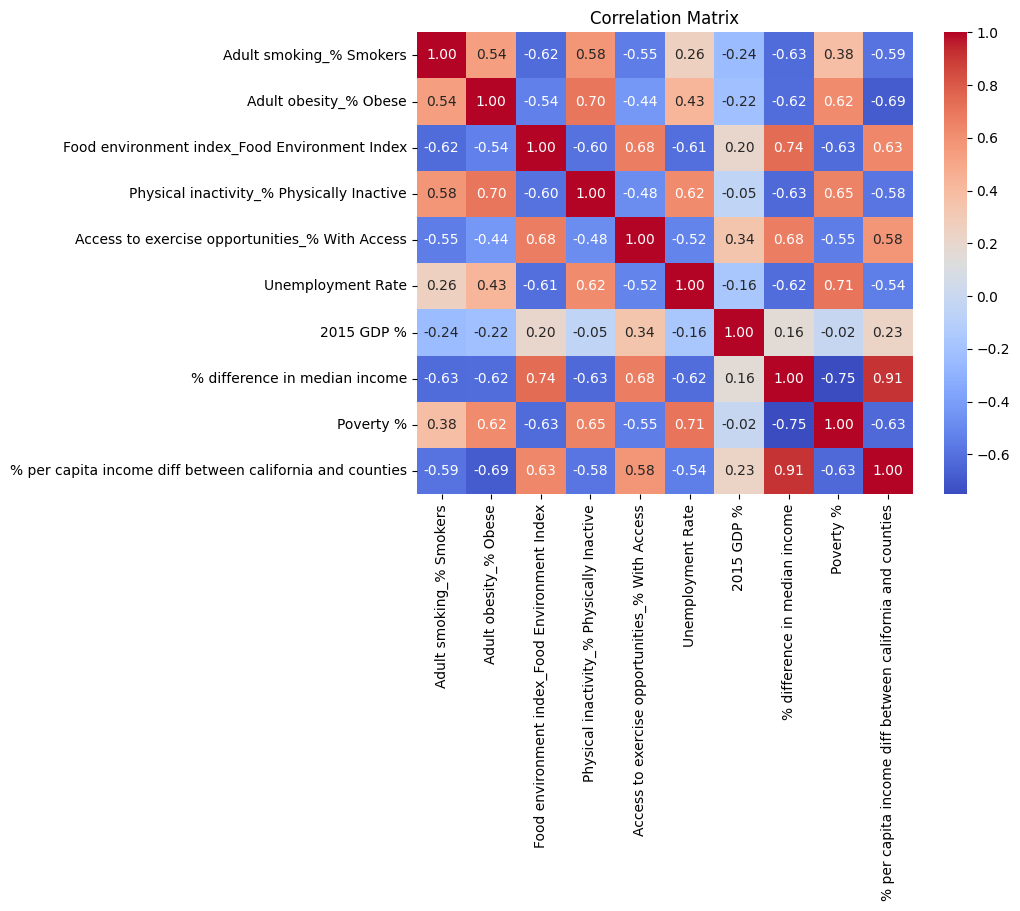

In [ ]:
# @title Correlation Matrix
import seaborn as sns
correlation_matrix = corr[['Adult smoking_% Smokers','Adult obesity_% Obese','Food environment index_Food Environment Index',
                          'Physical inactivity_% Physically Inactive','Access to exercise opportunities_% With Access',
                          'Unemployment Rate','2015 GDP %','% difference in median income','Poverty %',
                          '% per capita income diff between california and counties']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Notable Observations From the Matrix:

1. Unemployment Rate: Food Environment Index(-0.61), Physical Inactivity(0.62)

2. Median Income: Food Environment Index(0.74), Excercise Opportunities(0.68), Obesity(-0.62), Physical Inactivity(-0.63)

3. Poverty %: Obesity(0.62), Food Environment Index(-0.63), Physical Inactivity(0.65)

4. Personal Income(per capita): Obesity(-0.69), Food Environment Index(0.63)

Text(0.5, 0.98, 'Relationship Between Obesity and per capita personal income')

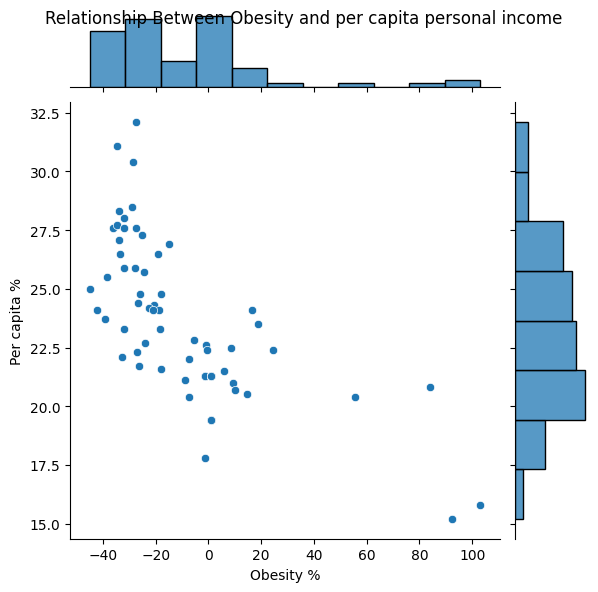

In [ ]:
plot = sns.jointplot(y=corr["Adult obesity_% Obese"], x=corr['% per capita income diff between california and counties'])
plot.set_axis_labels(xlabel="Obesity %", ylabel="Per capita %")
plot.fig.suptitle("Relationship Between Obesity and per capita personal income")
sns.set_style("whitegrid")
plt.show()


In [ ]:
fig = px.scatter(corr, x='% per capita income diff between california and counties', y='Adult obesity_% Obese', hover_name='County')

# Updating layout and axis labels
fig.update_layout(
    title='Relationship Between Obesity and per capita personal income',
    xaxis_title='Per capita %',
    yaxis_title='Obesity %',
)

fig.show()

From the above plot Counties like: Stanislaus, Merced, San Joaquin have low per capita income and also high obesity percentage as well.

In [ ]:
fig = go.Figure()

fig1 = fig.add_trace(go.Scatter(x=corr['County'], y=corr['Unemployment Rate'], mode='lines', name='Unemployment Rate', line=dict(color='#53D1BA')))
fig1 = fig.add_trace(go.Scatter(x=corr['County'], y=corr['Physical inactivity_% Physically Inactive'], mode='lines', name='Physical Inactivity', line=dict(color='#D11E5D')))

fig2 = fig1.update_layout(
    title='Unemployment vs Physical Inactivity',
    xaxis=dict(title='Counties of Califormia'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Physical Inactivity Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark')

fig2.show()

From the Above plot, we can see that County: Imperial,

In [ ]:
corr_geo = corr.merge(cal_data[['County','geometry']], on = 'County', how = 'left')
del corr_geo['Adult smoking_% Smokers']
corr_geo.columns

Index(['State', 'County', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'Unemployment Rate',
       'Labor Force', 'Description_x', '2015 GDP %',
       '% difference in median income', 'Rank within US (of 3141 counties)',
       'Poverty %', 'Poverty Rank within US (of 3142 counties)',
       'Description_y',
       '% per capita income diff between california and counties',
       'Population 2015', 'geometry'],
      dtype='object')

In [ ]:
# @title Folium map between Median income and Excercise Opportunity Points
# Create your Folium map with the default tiles:
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Create a choropleth layer to highlight each county
folium.Choropleth(
    geo_data=cal_data,
    name='choropleth',
    data=corr_geo,
    columns=['County', '% difference in median income'],
    key_on='feature.properties.County',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Median Income'
).add_to(m)

# Save the Folium map with the choropleth layer
m.save('california_counties_choropleth_obesity.html')

# Create MarkerCluster for the GeoJSON data
marker_cluster = MarkerCluster().add_to(m)

# Add GeoJSON data to the MarkerCluster
for idx, row in gdf.iterrows():
    folium.Marker([row['geometry'].y, row['geometry'].x]).add_to(marker_cluster)

# Save the Folium map with MarkerClusters
m.save('california_geojson_map_sports_clustered_obesity.html')

"\n# @title Folium map between Median income and Excercise Opportunity Points\n# Create your Folium map with the default tiles:\nm = folium.Map(location=[36.7783, -119.4179], zoom_start=6)\n\n# Create a choropleth layer to highlight each county\nfolium.Choropleth(\n    geo_data=cal_data,\n    name='choropleth',\n    data=corr_geo,\n    columns=['County', '% difference in median income'],\n    key_on='feature.properties.County',\n    fill_color='RdPu',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='Median Income'\n).add_to(m)\n\n# Save the Folium map with the choropleth layer\nm.save('california_counties_choropleth_obesity.html')\n\n# Create MarkerCluster for the GeoJSON data\nmarker_cluster = MarkerCluster().add_to(m)\n\n# Add GeoJSON data to the MarkerCluster\nfor idx, row in gdf.iterrows():\n    folium.Marker([row['geometry'].y, row['geometry'].x]).add_to(marker_cluster)\n\n# Save the Folium map with MarkerClusters\nm.save('california_geojson_map_sports_clustered_obe

In [ ]:
#m

<Axes: >

<Axes: >

[]

[]

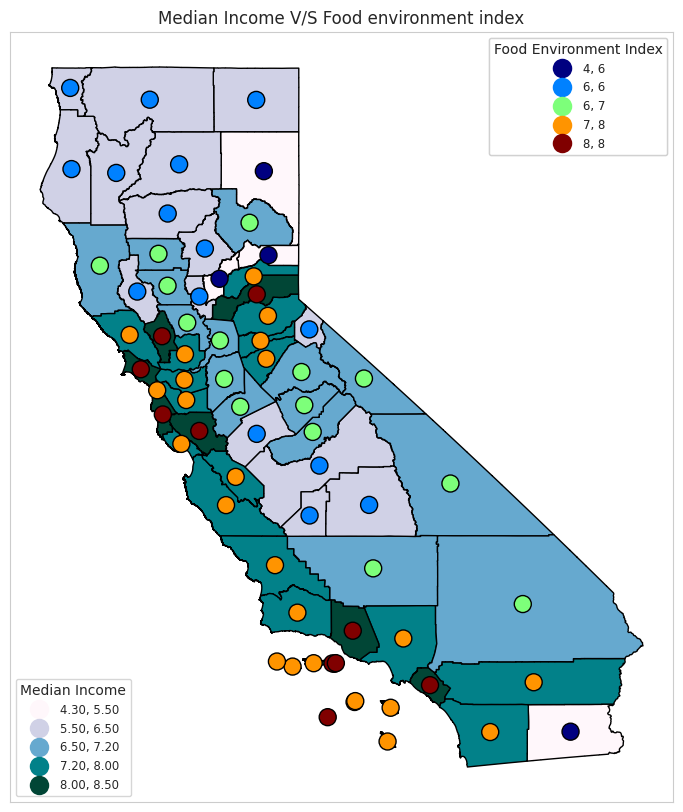

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,10))

cal_data.plot(ax=ax,column='Food environment index_Food Environment Index',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Median Income''')

cal_datac.plot(ax=ax,column='Food environment index_Food Environment Index',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)

ax.title.set_text("Median Income V/S Food environment index")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Food Environment Index''')



ax.add_artist(l2)
ax.add_artist(l1)

In [ ]:
# @title Relation Between Unemployment Rate, Poverty % and Physical Inactivity
import plotly.graph_objs as go

# Assuming corr is a DataFrame containing the necessary data

fig = go.Figure()

# Add the first trace
fig.add_trace(go.Scatter(x=corr['County'], y=corr['Unemployment Rate'], mode='lines', name='Unemployment Rate', line=dict(color='#53D1BA')))

# Add the second trace
fig.add_trace(go.Scatter(x=corr['County'], y=corr['Poverty %'], mode='lines', name='Poverty %', line=dict(color='#D11E5D')))

# Add a third trace (assuming 'Column_3' is another column in corr)
fig.add_trace(go.Scatter(x=corr['County'], y=corr['Physical inactivity_% Physically Inactive'], mode='lines', name='Physical Inactivity', line=dict(color='#FFA500')))  # Adjust color and name as needed

# Update the layout
fig.update_layout(
    title='Relation between Unemployment Rate, Poverty % and Physical Inactivity',
    xaxis=dict(title='Counties of California'),
    yaxis=dict(title='Normalized Value'),
    #yaxis2=dict(title='Normalized Physical Inactivity Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

# Show the figure
fig.show()


I chose these 3 factors because, Poverty and Unemployment Rate are positively correlated with the factor of 0.71. Also Unemployment Rate and Poverty are positively correlated to Physical Inactivity with the factor of 0.62 and 0.65 respectively.

From the plot, Counties:

1. Imperial(178937):


> Unemployment Population: 44018

> Poverty Population: 32208

> Physical Inactivity Population: 41334

2. Fresno(969488):

> Unemployment Population: 99857

> Poverty Population: 156087

> Physical Inactivity Population: 177416

3. Merced(266353):

> Unemployment Population: 30364

> Poverty Population: 43415

> Physical Inactivity: 53270

4. Tulare(457161):

> Unemployment Population: 53487

> Poverty Population: 74974

> Physical Inactivity: 90060



<Axes: >

<Axes: >

[]

[]

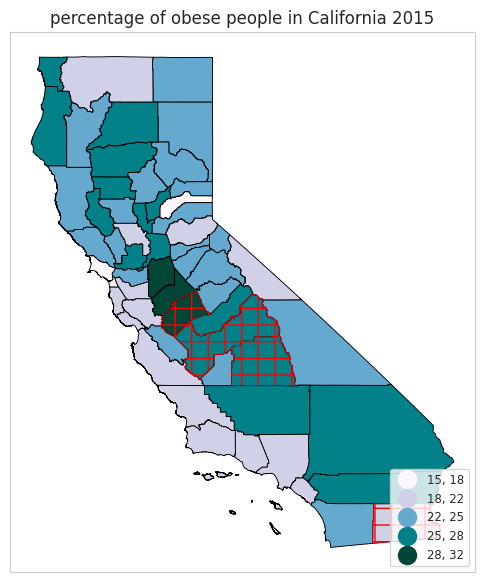

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
cal_datac_q = cal_data.query("County=='Merced' | County=='Fresno' | County=='Tulare'| County=='Imperial' ")
cal_data.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.65,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
cal_datac_q.plot(ax=ax, edgecolor='red', linewidth=0.5, facecolor="none", alpha=1, hatch='+')
ax.title.set_text("percentage of obese people in California 2015")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [ ]:
counties = ['Imperial','Fresno','Merced','Tulare']
df_pop[df_pop['County'].isin(counties)]

County  Population 2015
9     Fresno           969488
12  Imperial           178937
23    Merced           266353
53    Tulare           457161

In [ ]:
cal_datac = cal_datac.merge(corr[['County','% difference in median income', 'Poverty %','Unemployment Rate','% per capita income diff between california and counties']], on = ['County'], how = 'left')

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

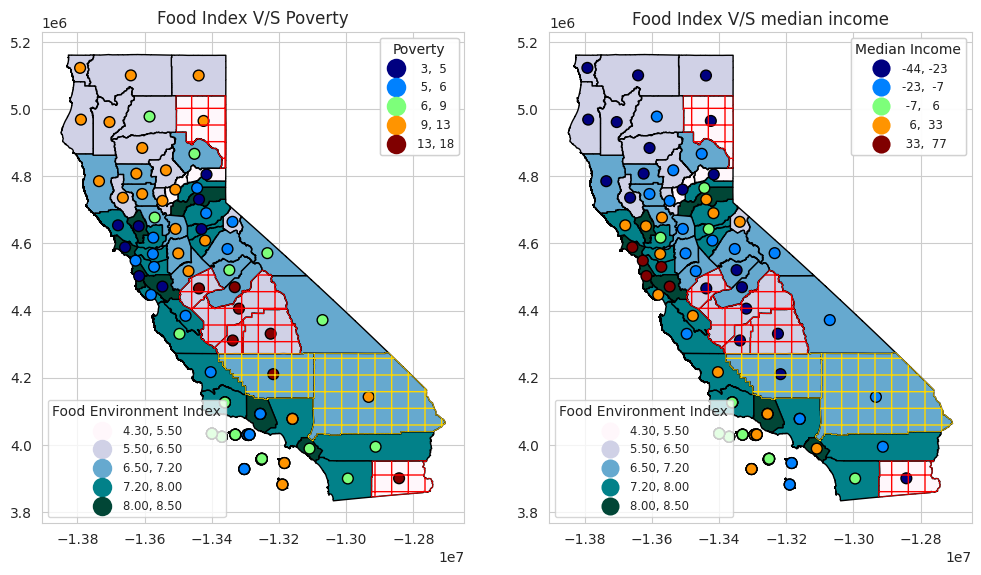

In [ ]:
# @title Relation Between Median Income, Poverty % and Food Environment Index

fig, ax = plt.subplots(1,2, figsize=(12,10))

cal_datac_q = cal_data.query("County=='Merced' | County=='Fresno' | County=='Lassen'| County=='Kings'| County=='Tulare'| County=='Imperial' ")
cal_datac_e = cal_data.query("County=='San Bernardino' | County=='Kern'")
cal_data.plot(ax=ax[0],column='Food environment index_Food Environment Index',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax[0].get_legend()
l1.set_title('''Food Environment Index''')

cal_datac.plot(ax=ax[0],column='Poverty %',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 60)
cal_datac_q.plot(ax=ax[0], edgecolor='red', linewidth=0.5, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax[0], edgecolor='gold', linewidth=0.5, facecolor="none", alpha=1, hatch='+')

ax[0].title.set_text("Food Index V/S Poverty")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[0].get_legend()
l2.set_title('''Poverty''')



ax[0].add_artist(l2)
ax[0].add_artist(l1)

#Second Map
cal_data.plot(ax=ax[1],column='Food environment index_Food Environment Index',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.3})

l1 = ax[1].get_legend()
l1.set_title('''Food Environment Index''')

cal_datac.plot(ax=ax[1],column='% difference in median income',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.3},
         markersize = 60)
cal_datac_q.plot(ax=ax[1], edgecolor='red', linewidth=0.5, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax[1], edgecolor='gold', linewidth=0.5, facecolor="none", alpha=1, hatch='+')

ax[1].title.set_text("Food Index V/S median income")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[1].get_legend()
l2.set_title('''Median Income''')



ax[1].add_artist(l2)
ax[1].add_artist(l1)

I chose these 3 factors because, Poverty and Median income are negatively correlated with the factor of 0.75. Also Median Income and Poverty are correlated to Food Environment with the factor of 0.74 and -0.63 respectively.

The Counties Highlighted in Red are: Merced, Fresno, Lassen, Kings, Tulare, Imperial.
Red Highlighted area shows that the county has Low Food Environment Index as well as High Poverty percentage and low median income.

The Counties Highlighted in Yellow are: Kern and San Bernardino.
Red Highlighted area shows that the county has High Food Environment Index but High Poverty percentage and low median income.

In [ ]:
bar_graph = corr[['County','Unemployment Rate','% difference in median income','Physical inactivity_% Physically Inactive']]

<Axes: >

<Axes: >

<Axes: >

<Axes: >

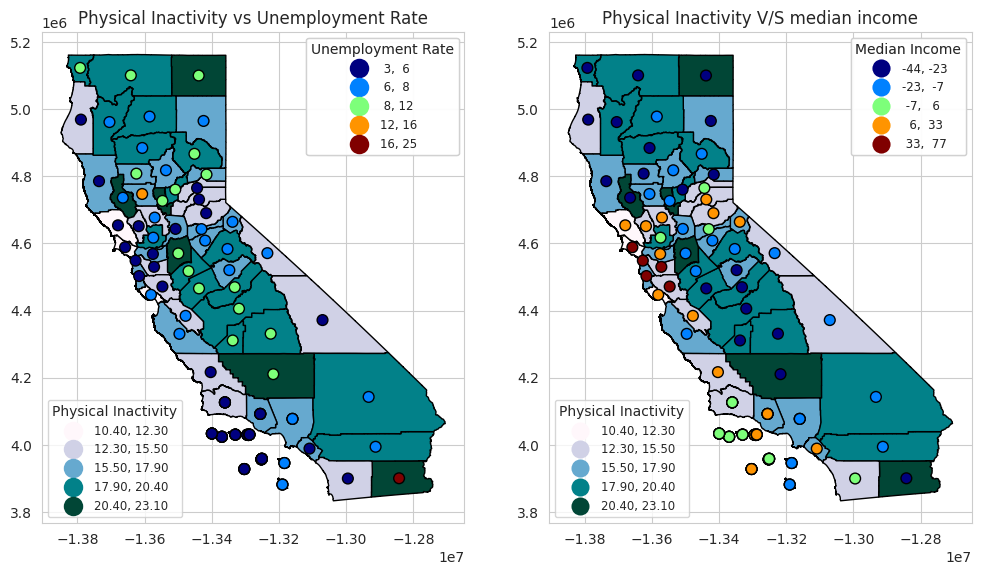

In [ ]:
# @title Relation Between Median Income, Unemployment Rate and Physical Inactivity

fig, ax = plt.subplots(1,2, figsize=(12,10))

cal_data.plot(ax=ax[0],column='Physical inactivity_% Physically Inactive',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax[0].get_legend()
l1.set_title('''Physical Inactivity''')

cal_datac.plot(ax=ax[0],column='Unemployment Rate',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 60)

ax[0].title.set_text("Physical Inactivity vs Unemployment Rate")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[0].get_legend()
l2.set_title('''Unemployment Rate''')



ax[0].add_artist(l2)
ax[0].add_artist(l1)

#Second Map
cal_data.plot(ax=ax[1],column='Physical inactivity_% Physically Inactive',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.3})

l1 = ax[1].get_legend()
l1.set_title('''Physical Inactivity''')

cal_datac.plot(ax=ax[1],column='% difference in median income',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.3},
         markersize = 60)


ax[1].title.set_text("Physical Inactivity V/S median income")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[1].get_legend()
l2.set_title('''Median Income''')



ax[1].add_artist(l2)
ax[1].add_artist(l1)

These factor were taken together because Unemployment Rate and Median income are negatively correlated with the factor of 0.62. Also Both of them are correlated to Physical Inactivity with the factor 0.62 for Unemployment Rate and -0.63 for Median Income

From the Plot we can confirm that, high Unemployment rate and low median income leads to High Physical Inactivity is one of the factors leading to Obesity

In [ ]:
corr.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'Unemployment Rate',
       'Labor Force', 'Description_x', '2015 GDP %',
       '% difference in median income', 'Rank within US (of 3141 counties)',
       'Poverty %', 'Poverty Rank within US (of 3142 counties)',
       'Description_y',
       '% per capita income diff between california and counties',
       'Population 2015'],
      dtype='object')

In [ ]:
# @title Relation Between Personal income(per capita), Median Income and Obesity
import plotly.graph_objs as go

# Assuming corr is a DataFrame containing the necessary data

fig = go.Figure()

# Add the first trace
fig.add_trace(go.Scatter(x=corr['County'], y=corr['% per capita income diff between california and counties'], mode='lines', name='personal income per capita', line=dict(color='#53D1BA')))

# Add the second trace
fig.add_trace(go.Scatter(x=corr['County'], y=corr['% difference in median income'], mode='lines', name='Median Income', line=dict(color='#D11E5D')))

# Add a third trace (assuming 'Column_3' is another column in corr)
fig.add_trace(go.Scatter(x=corr['County'], y=corr['Adult obesity_% Obese'], mode='lines', name='Obesity', line=dict(color='#FFA500')))  # Adjust color and name as needed

# Update the layout
fig.update_layout(
    title='Relation Between Personal income(per capita), Median Income and Obesity',
    xaxis=dict(title='Counties of California'),
    yaxis=dict(title='Normalized Value'),
    #yaxis2=dict(title='Normalized Physical Inactivity Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

# Show the figure
fig.show()
